In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import sklearn.metrics as metrics


from scipy.stats import skew
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set custom font and color for figure title
plt.rcParams.update({'axes.titlesize': 15.5,
                     'axes.titleweight': 'bold',
                     'axes.titlecolor': 'brown',
                   'figure.figsize' : (8, 6)})

sns.set_palette('rocket')

| Column Name                     | Description                                                                                                               |
|---------------------------------|---------------------------------------------------------------------------------------------------------------------------|
| CUSTID                          | Customer ID (Categorical)                                                                                                |
| BALANCE                         | Remaining balance amount in their account for purchases                                                                   |
| BALANCEFREQUENCY               | How frequently the balance is updated, scored between 0 and 1 (1 = frequently updated, 0 = not frequently updated)      |
| PURCHASES                       | Amount of purchases made from the account                                                                                 |
| ONEOFFPURCHASES                 | Maximum purchase amount done in one-go                                                                                    |
| INSTALLMENTSPURCHASES           | Amount of purchases done in installment                                                                                   |
| CASHADVANCE                     | Cash in advance given by the user                                                                                         |
| PURCHASESFREQUENCY              | How frequently purchases are being made, scored between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)|
| ONEOFFPURCHASESFREQUENCY        | How frequently one-off purchases are being made, scored between 0 and 1 (1 = frequently made, 0 = not frequently made)   |
| PURCHASESINSTALLMENTSFREQUENCY  | How frequently installment purchases are being made, scored between 0 and 1 (1 = frequently done, 0 = not frequently done)|
| CASHADVANCEFREQUENCY            | How frequently cash in advance is being taken                                                                             |
| CASHADVANCETRX                  | Number of transactions made with "Cash Advance"                                                                           |
| PURCHASESTRX                    | Number of purchase transactions                                                                                           |
| CREDITLIMIT                     | Credit limit for the user                                                                                                 |
| PAYMENTS                        | Amount of payments done by the user                                                                                       |
| MINIMUM_PAYMENTS                | Minimum amount of payments done by the user                                                                               |
| PRCFULLPAYMENT                  | Percentage of full payment paid by the user                                                                               |
| TENURE                          | Duration of credit card service for the user                                                                              |

## 1. <a name="1">Read the dataset</a>

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [3]:
#read the data

data_path = 'CC GENERAL.csv'
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


## 2. <a name="2">Data investigation</a>

In [4]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [6]:
# This will print basic statistics for numerical columns
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [7]:
df.isnull().sum().sum() / len(df) * 100

3.5083798882681565

In [8]:
# check duplicates
df.duplicated().sum()

0

In [9]:
df = df.drop(columns=['CUST_ID'])
columns = df.columns

In [10]:
low_cols = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

medium_cols = ['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'TENURE']

merge = low_cols + medium_cols
other_cols = list(set(columns) - set(merge))

In [11]:
def pick_random_color():
  return '#'+str(np.random.randint(100000, 999999))

def plot_multi_histplot(columns_list, bins='auto', figsize=(15, 10)):
    color = pick_random_color()
    num_cols = 3
    num_plots = len(columns_list)
    num_rows = -(-num_plots // num_cols)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.ravel()

    for i, col in enumerate(columns_list):
        plt.sca(axes[i])
        if col in df.columns:
            sns.histplot(data=df, x=col, kde=True, bins=bins, color=color)
            plt.title(f'{col}')
            plt.xlabel('Value')
            plt.ylabel('Frequency')
            plt.grid(True)

        else:
            plt.axis('off')

    plt.tight_layout()

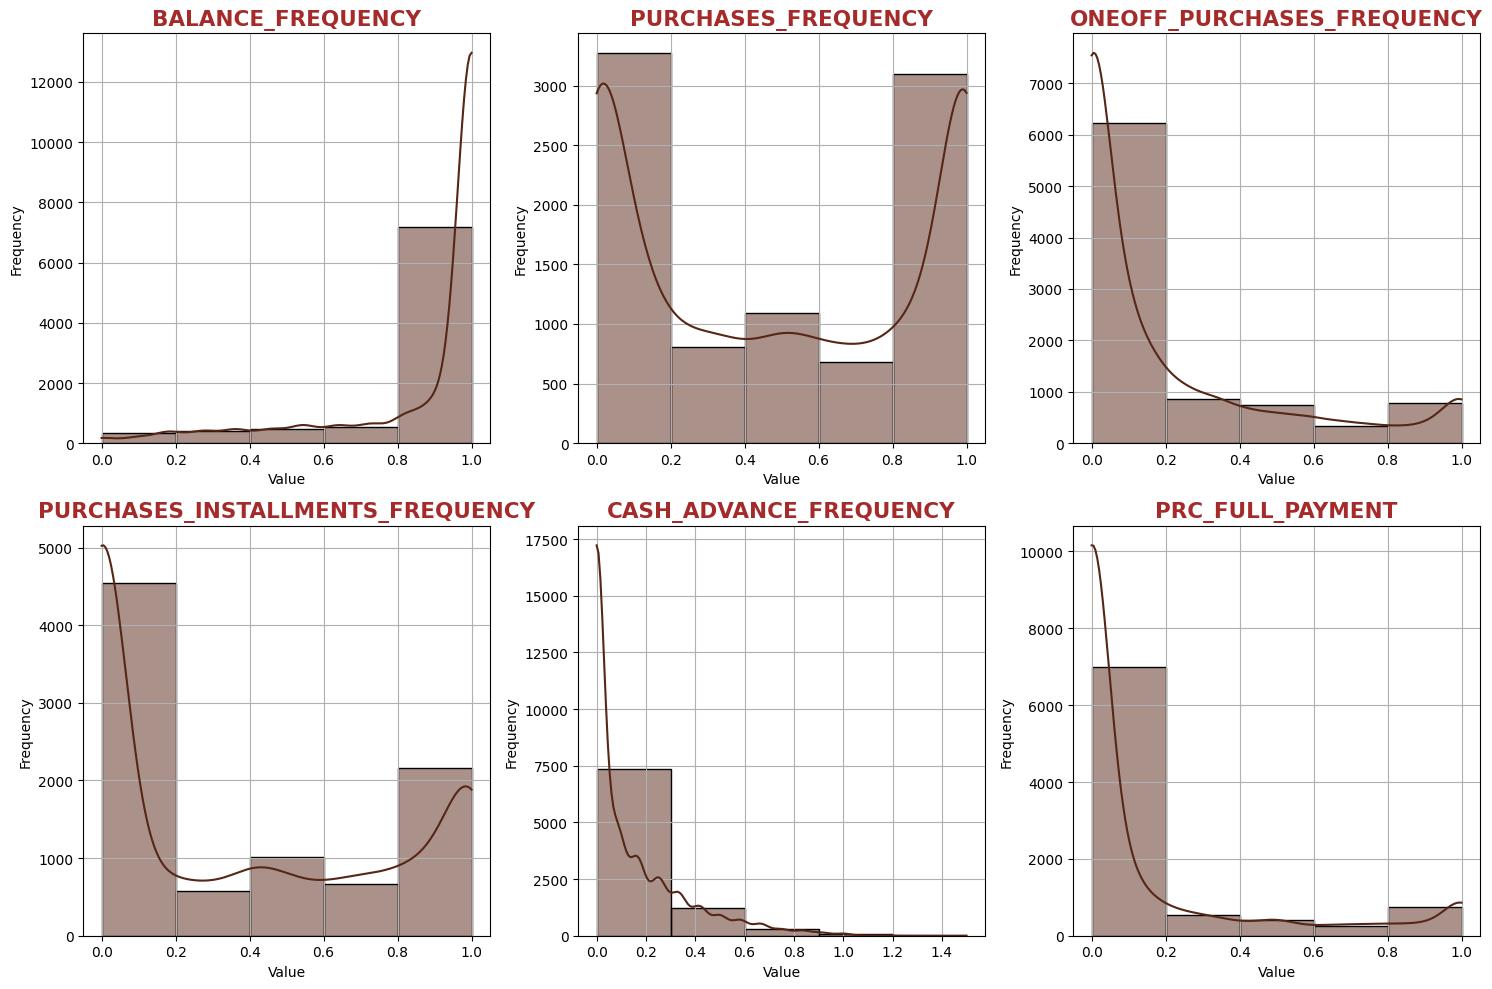

In [12]:
plot_multi_histplot(low_cols, bins=5)

Insights from the previous plots:

- Regarding purchase frequency, there appear to be three distinct categories:
    - Approximately 3,100 individuals frequently make purchases.
    - About 3,500 individuals make purchases rarely.
    - Around 2,500 individuals make purchases moderately.

- Analysis of one-off purchase frequency reveals:
    - Roughly 7,300 individuals make one-off purchases sparingly, while approximately 1,000 individuals make such purchases frequently.

- Examination of balance frequency indicates that the majority, approximately 7,500 individuals, experience rapid balance changes, suggesting potential challenges in money management.

- Only around 2,000 individuals opt for immediate installment payments, while about 5,000 individuals choose to make installment payments regularly.

- A significant portion, around 7,500 customers, engage in cash advances.

- Analysis of the percentage of full payments reveals that approximately 7,000 individuals have outstanding balances, while only about 800 have paid off their balances in full.

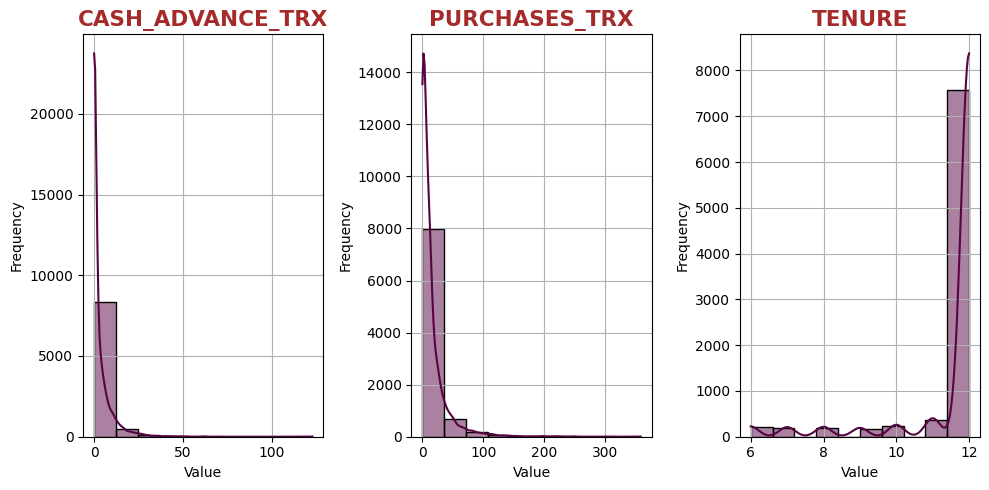

In [13]:
plot_multi_histplot(medium_cols, figsize=(10,5), bins=10)

Insights from the previous plots:
- Analysis of cash advance transactions reveals that approximately 8,000 individuals engage in transactions with cash advances fewer than 25 times.
- Analysis of purchase transactions indicates that around 8,000 individuals make transactions infrequently, typically fewer than 25 times.
- Examination of tenure data shows that roughly 7,500 users have utilized the credit card service for 12 months.


In [22]:
df[other_cols].describe()

BALANCE  CASH_ADVANCE     PURCHASES  INSTALLMENTS_PURCHASES  \
count   8950.000000   8950.000000   8950.000000             8950.000000   
mean    1564.474828    978.871112   1003.204834              411.067645   
std     2081.531879   2097.163877   2136.634782              904.338115   
min        0.000000      0.000000      0.000000                0.000000   
25%      128.281915      0.000000     39.635000                0.000000   
50%      873.385231      0.000000    361.280000               89.000000   
75%     2054.140036   1113.821139   1110.130000              468.637500   
max    19043.138560  47137.211760  49039.570000            22500.000000   

       MINIMUM_PAYMENTS      PAYMENTS  CREDIT_LIMIT  ONEOFF_PURCHASES  
count       8637.000000   8950.000000   8949.000000       8950.000000  
mean         864.206542   1733.143852   4494.449450        592.437371  
std         2372.446607   2895.063757   3638.815725       1659.887917  
min            0.019163      0.000000     50.000000          0.000000  
25%          169.123707    383.276166   1600.000000          0.000000  
50%          312.343947    856.901546   3000.000000         38.000000  
75%          825.485459   1901.134317   6500.000000        577.405000  
max        76406.207520  50721.483360  30000.000000      40761.250000

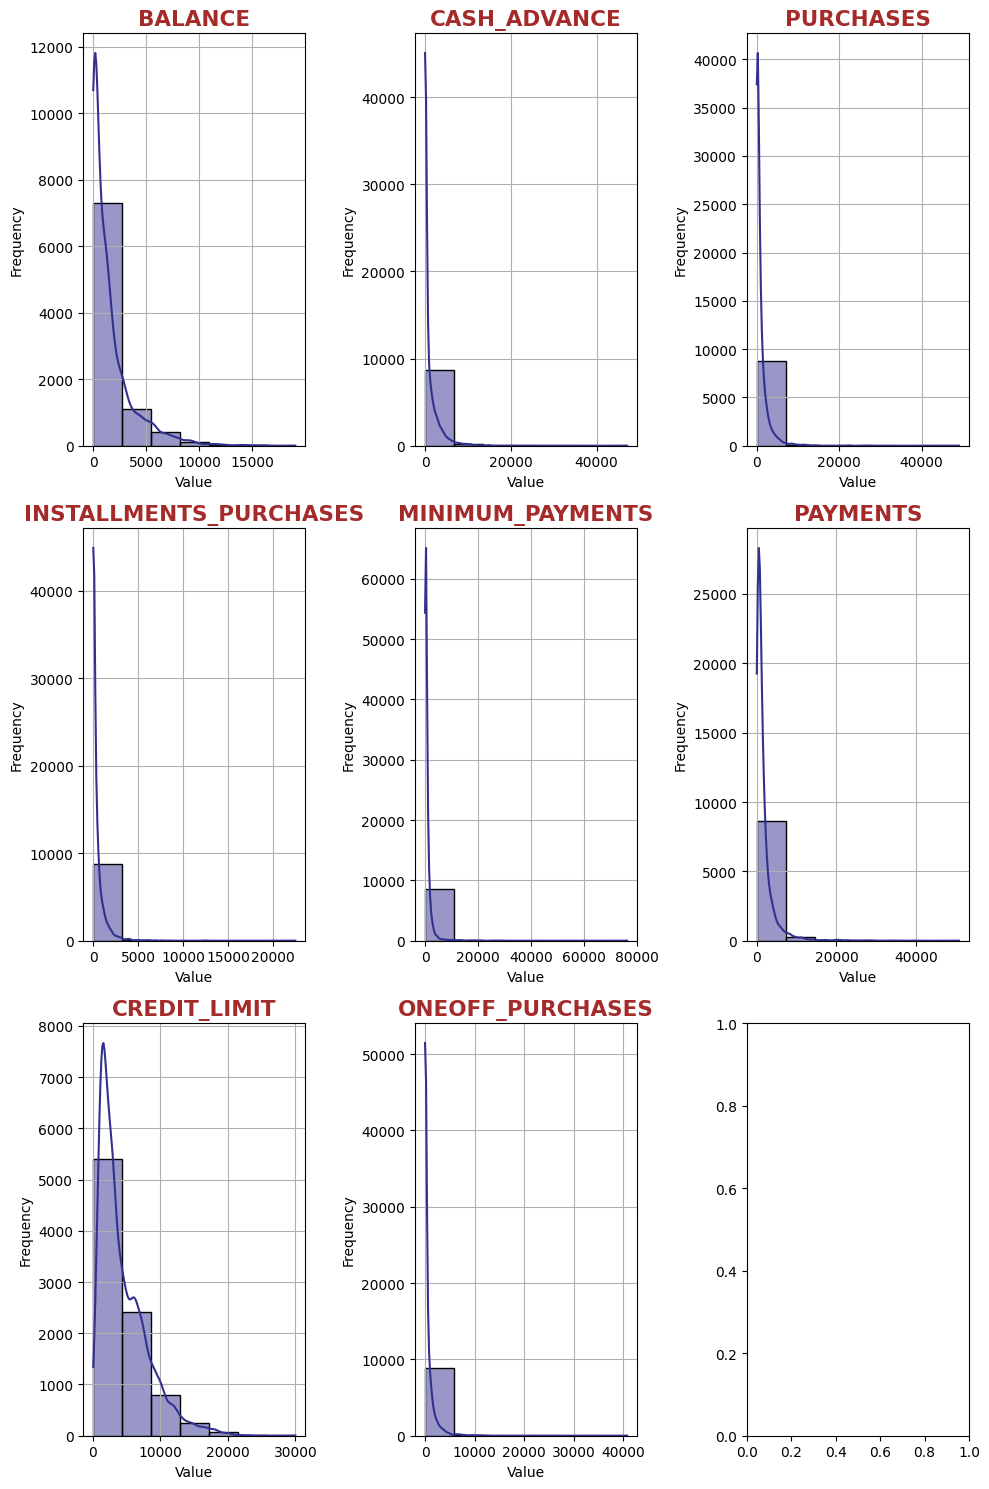

In [14]:
plot_multi_histplot(other_cols, figsize=(10,15), bins=7)

- Most users, approximately 8700, make installment purchases less than $2500,

  while only 230 users make purchases exceeding $2500.

- The mean balance across all accounts is approximately $1564.47.

- Some accounts have a balance of $0, indicating accounts with no remaining balance.

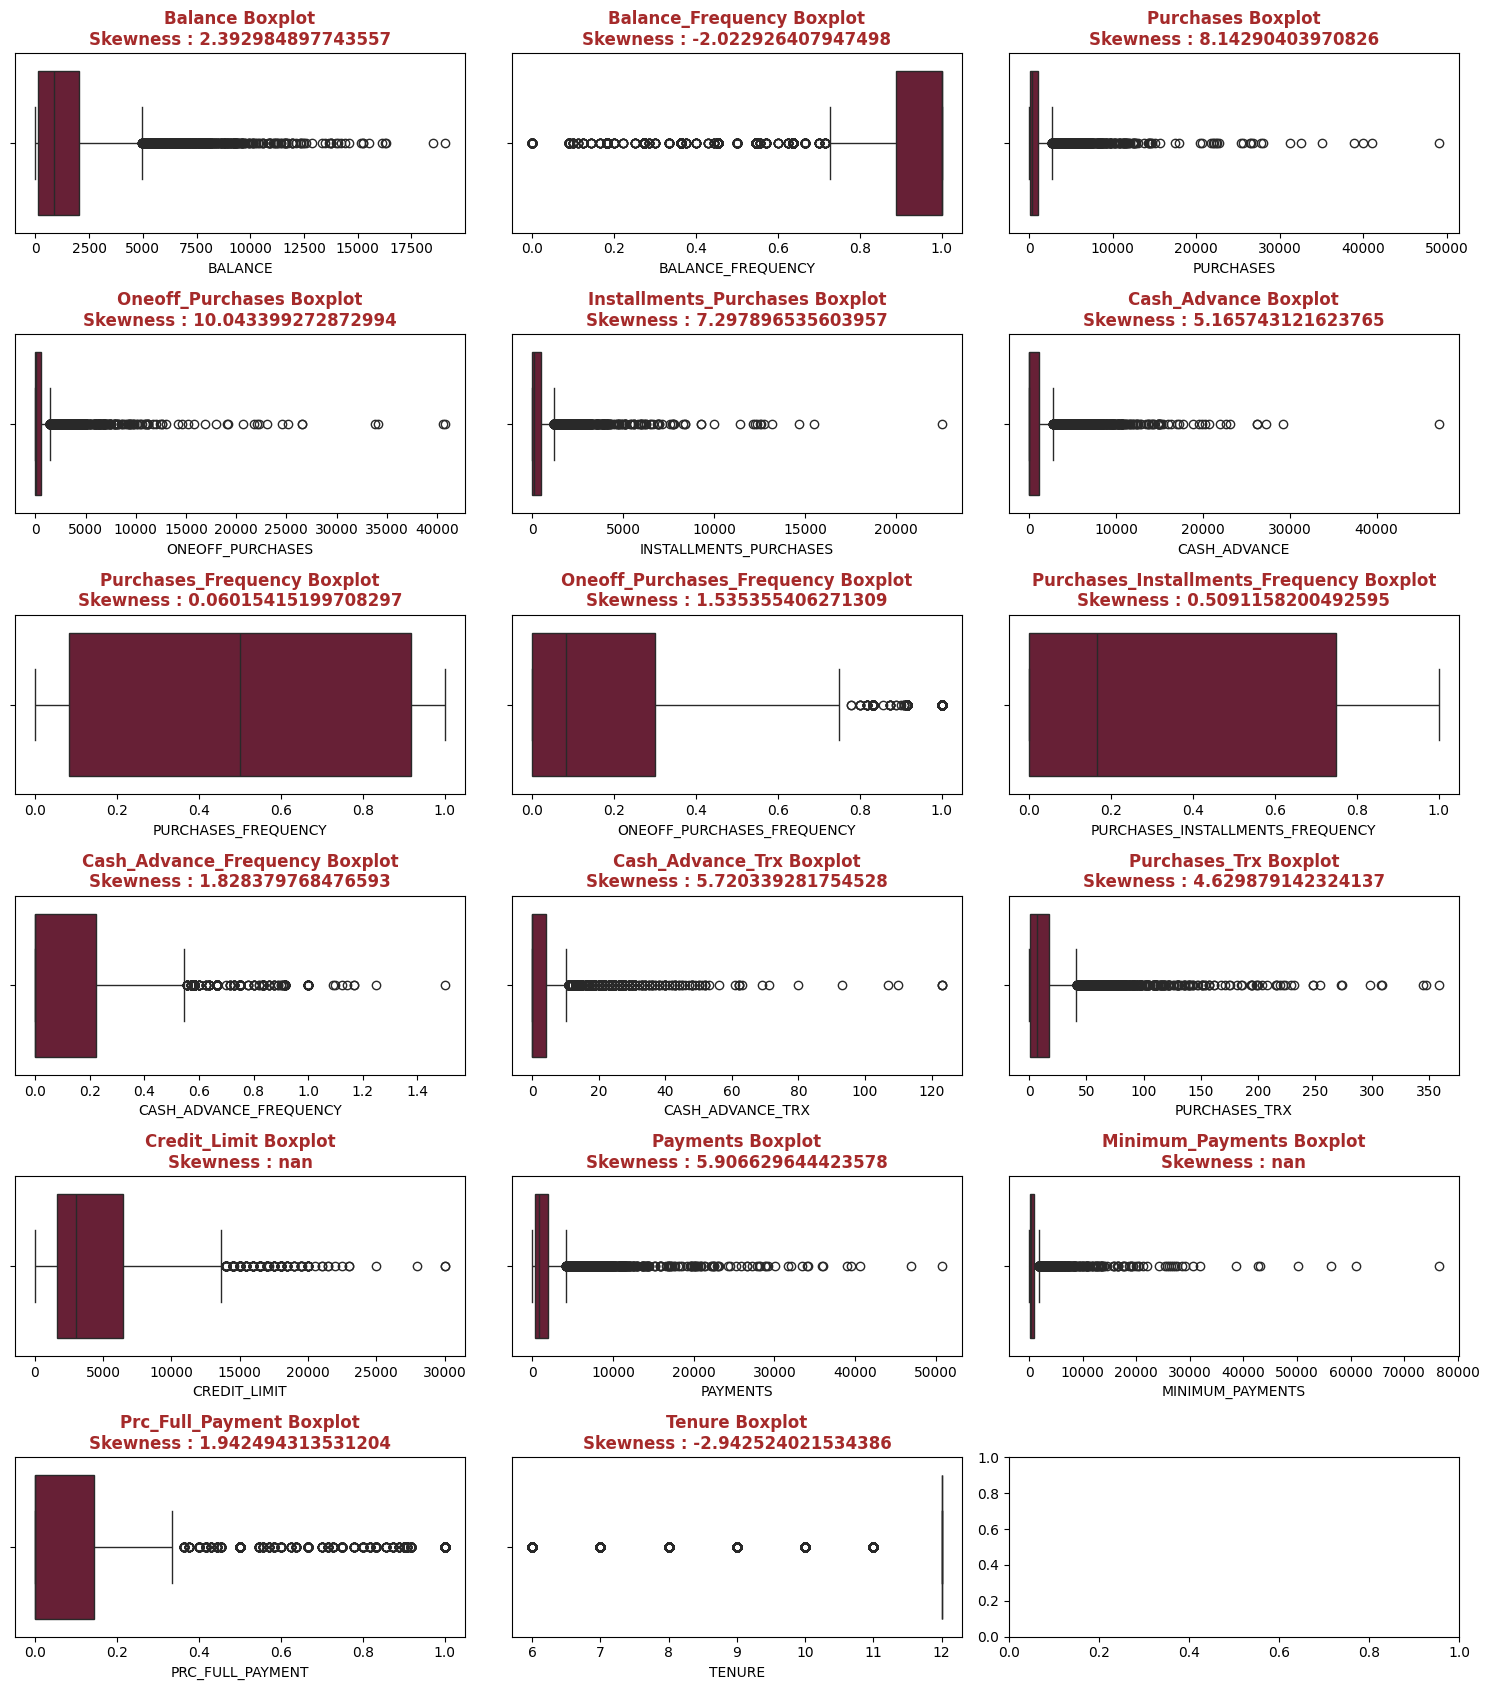

In [23]:
# check outliers & skewness
def show_distribution(dataframe, columns_list):
    fig, ax = plt.subplots(6, 3, figsize=(15,17))
    ax = ax.ravel()

    color = pick_random_color()
    for i, col in enumerate(columns_list):
      skewness_value = skew(dataframe[col], bias=True)
      plt.sca(ax[i])
      sns.boxplot(data=dataframe, x=col, color=color)
      plt.title(f'{col.title()} Boxplot\nSkewness : {skewness_value}', fontsize=12)

    plt.tight_layout()

show_distribution(df, columns)

- **Data Type Verification:**
  - The data types are confirmed to be correct.

- **Missing Values Analysis:**
  - The dataset contains minimal missing values, with one column having only 1 NaN value and another column with approximately 3.5% NaN values, resulting in an overall total of 3.5% missing values.

- **Duplicate Values Check:**
  - No duplicated values were found within the dataset.

- **Outlier Detection:**
  - Numerous outliers were observed across most columns within the dataset.

- **Skewness Examination:**
  - The majority of columns exhibit positive skewness, with only one column showing approximately normal distribution (purchased frequency), and one column displaying negative skewness (balance frequency).

These insights provide a comprehensive overview of the data's quality, highlighting areas for further investigation and potential preprocessing steps.

## 3. <a name="3">Data preprocessing</a>

In [24]:
#make a copy for the original dataset
df_copy=df.copy()

In [25]:
df_copy = df_copy.dropna()

> **I will use the data as it is now and see results. Later, after solving the issues I found in the data, I can compare the results.**

In [26]:
# Apply TSNE to just visualize data and see the effect of each transformation on data
def TSNE_2D(df, perplexity=40, n_iter=300, hue=None):
  tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=n_iter)
  tsne_results = tsne.fit_transform(df)

  tsne_2d_one = tsne_results[:,0]
  tsne_2d_two = tsne_results[:,1]

  sns.scatterplot(
    x=tsne_2d_one, y=tsne_2d_two,
    legend="full",
    hue=hue,
    palette='tab10'
  )
  plt.title("TSNE");

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8636 samples in 0.002s...
[t-SNE] Computed neighbors for 8636 samples in 0.766s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8636
[t-SNE] Computed conditional probabilities for sample 2000 / 8636
[t-SNE] Computed conditional probabilities for sample 3000 / 8636
[t-SNE] Computed conditional probabilities for sample 4000 / 8636
[t-SNE] Computed conditional probabilities for sample 5000 / 8636
[t-SNE] Computed conditional probabilities for sample 6000 / 8636
[t-SNE] Computed conditional probabilities for sample 7000 / 8636
[t-SNE] Computed conditional probabilities for sample 8000 / 8636
[t-SNE] Computed conditional probabilities for sample 8636 / 8636
[t-SNE] Mean sigma: 265.478475
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.338333
[t-SNE] KL divergence after 300 iterations: 2.347125


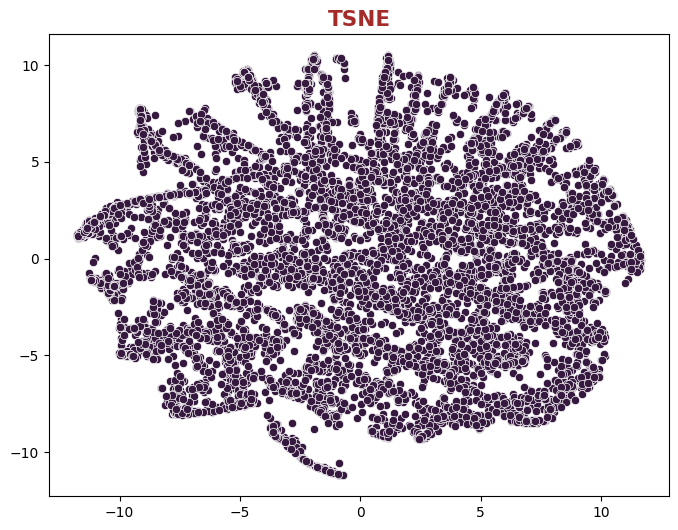

In [27]:
TSNE_2D(df_copy)

This is our data points without undergoing any preprocessing or transformation. Now, I will apply Robust Scaler to mitigate the impact of outliers and reevaluate the TSNE visualization.

## 4. <a name="4">Features transformation</a>

I will apply Robust Scaler to specific columns, excluding those that already have values within the range of 0 to 1. All other columns will undergo Robust Scaler transformation.

In [28]:
transformer = RobustScaler()
values = transformer.fit_transform(df_copy[medium_cols+other_cols])
values

array([[ 0.        , -0.29411765,  0.        , ..., -0.45340036,
        -0.40816327, -0.07510432],
       [ 1.        , -0.41176471,  0.        , ...,  2.0921263 ,
         0.81632653, -0.07510432],
       [ 0.        ,  0.29411765,  0.        , ..., -0.1791805 ,
         0.91836735,  1.21544817],
       ...,
       [ 0.        , -0.11764706, -6.        , ..., -0.53204623,
        -0.40816327, -0.07510432],
       [ 0.5       , -0.41176471, -6.        , ..., -0.55078637,
        -0.51020408, -0.07510432],
       [ 0.5       ,  0.94117647, -6.        , ..., -0.54385986,
        -0.36734694,  1.74971624]])

In [29]:
values_df = pd.DataFrame(data=values, columns=transformer.get_feature_names_out())
values_df.head(3)

CASH_ADVANCE_TRX  PURCHASES_TRX  TENURE   BALANCE  CASH_ADVANCE  PURCHASES  \
0               0.0      -0.294118     0.0 -0.447578       0.00000  -0.253947   
1               1.0      -0.411765     0.0  1.167856       5.68971  -0.340469   
2               0.0       0.294118     0.0  0.806445       0.00000   0.360748   

   INSTALLMENTS_PURCHASES  MINIMUM_PAYMENTS  PAYMENTS  CREDIT_LIMIT  \
0                0.001270         -0.263498 -0.453400     -0.408163   
1               -0.195777          1.157778  2.092126      0.816327   
2               -0.195777          0.479684 -0.179180      0.918367   

   ONEOFF_PURCHASES  
0         -0.075104  
1         -0.075104  
2          1.215448

In [30]:
df_copy = df_copy.reset_index(drop=True)

In [31]:
df_copy = pd.concat((values_df, df_copy[low_cols]), axis=1)
df_copy

CASH_ADVANCE_TRX  PURCHASES_TRX  TENURE   BALANCE  CASH_ADVANCE  \
0                  0.0      -0.294118     0.0 -0.447578      0.000000   
1                  1.0      -0.411765     0.0  1.167856      5.689710   
2                  0.0       0.294118     0.0  0.806445      0.000000   
3                  0.0      -0.352941     0.0 -0.050657      0.000000   
4                  0.0       0.058824     0.0  0.456274      0.000000   
...                ...            ...     ...       ...           ...   
8631               0.0      -0.352941    -6.0 -0.465476      0.000000   
8632               0.0      -0.058824    -6.0 -0.453917      0.000000   
8633               0.0      -0.117647    -6.0 -0.456521      0.000000   
8634               0.5      -0.411765    -6.0 -0.461600      0.032285   
8635               0.5       0.941176    -6.0 -0.278038      0.112188   

      PURCHASES  INSTALLMENTS_PURCHASES  MINIMUM_PAYMENTS  PAYMENTS  \
0     -0.253947                0.001270         -0.263498 -0.453400   
1     -0.340469               -0.195777          1.157778  2.092126   
2      0.360748               -0.195777          0.479684 -0.179180   
3     -0.325958               -0.195777         -0.103090 -0.142466   
4      0.868732                2.558094          3.191663  0.328453   
...         ...                     ...               ...       ...   
8631  -0.321514               -0.195777         -0.409820 -0.546809   
8632  -0.076441                0.405527         -0.401574 -0.372627   
8633  -0.209507                0.102479         -0.350484 -0.532046   
8634  -0.340469               -0.195777         -0.391107 -0.550786   
8635   0.651040               -0.195777         -0.341539 -0.543860   

      CREDIT_LIMIT  ONEOFF_PURCHASES  BALANCE_FREQUENCY  PURCHASES_FREQUENCY  \
0        -0.408163         -0.075104           0.818182             0.166667   
1         0.816327         -0.075104           0.909091             0.000000   
2         0.918367          1.215448           1.000000             1.000000   
3        -0.367347         -0.048398           1.000000             0.083333   
4        -0.244898         -0.075104           1.000000             0.666667   
...            ...               ...                ...                  ...   
8631     -0.510204         -0.040219           0.500000             0.166667   
8632     -0.408163         -0.075104           1.000000             1.000000   
8633     -0.408163         -0.075104           0.833333             0.833333   
8634     -0.510204         -0.075104           0.833333             0.000000   
8635     -0.367347          1.749716           0.666667             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8631                    0.166667                          0.000000   
8632                    0.000000                          0.833333   
8633                    0.000000                          0.666667   
8634                    0.000000                          0.000000   
8635                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  PRC_FULL_PAYMENT  
0                   0.000000          0.000000  
1                   0.250000          0.222222  
2                   0.000000          0.000000  
3                   0.000000          0.000000  
4                   0.000000          0.000000  
...                      ...               ...  
8631                0.000000          0.000000  
8632                0.000000          0.500000  
8633                0.000000     

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8636 samples in 0.002s...
[t-SNE] Computed neighbors for 8636 samples in 0.724s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8636
[t-SNE] Computed conditional probabilities for sample 2000 / 8636
[t-SNE] Computed conditional probabilities for sample 3000 / 8636
[t-SNE] Computed conditional probabilities for sample 4000 / 8636
[t-SNE] Computed conditional probabilities for sample 5000 / 8636
[t-SNE] Computed conditional probabilities for sample 6000 / 8636
[t-SNE] Computed conditional probabilities for sample 7000 / 8636
[t-SNE] Computed conditional probabilities for sample 8000 / 8636
[t-SNE] Computed conditional probabilities for sample 8636 / 8636
[t-SNE] Mean sigma: 0.433627
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.236084
[t-SNE] KL divergence after 300 iterations: 2.515280


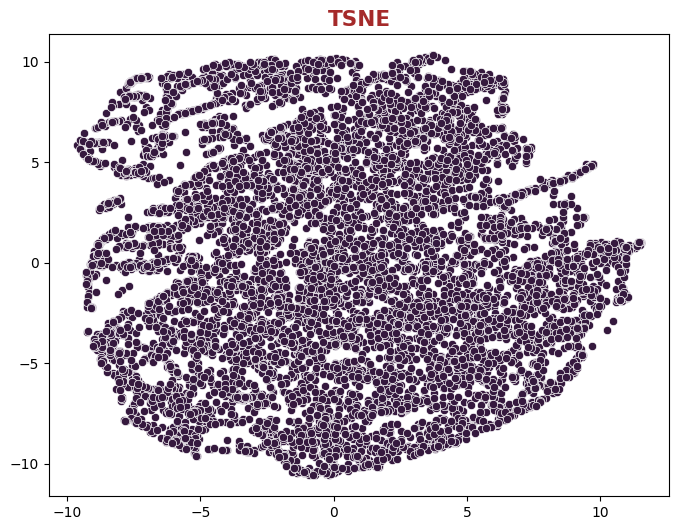

In [32]:
TSNE_2D(df_copy)

Upon applying Robust Scaler, I observed that some data points have become closer to each other.


## 5. <a name="5">K Means</a>

In [33]:
from sklearn.cluster import KMeans

### Elbow Method

In [34]:
wss = []
K = range(2,21)

for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans=kmeans.fit(df_copy)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

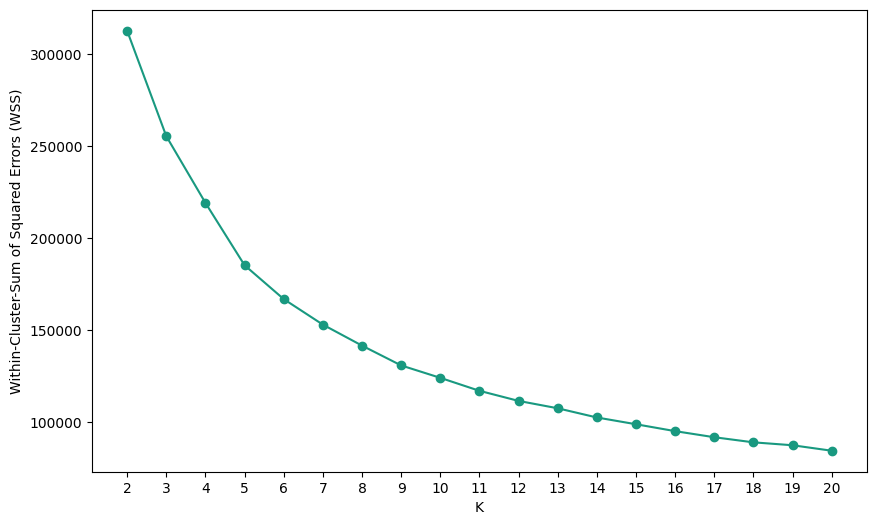

In [35]:
plt.figure(figsize=(10,6))
plt.plot(K,wss, marker = 'o', c=pick_random_color())
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.xticks(range(int(min(K)), int(max(K)) + 1));

> From the graph, I found the best number of clusters is 8 **(using elbow method)**

### The Silhouette Method
The silhouette method measures the similarity of a data point within its cluster. It has a range between +1 and -1 and the higher values denote a good clustering.

In [36]:
sil = []
K = range(2,21)
for k in K:
  kmeans = KMeans(n_clusters = k).fit(df_copy)
  labels = kmeans.labels_
  sil.append(metrics.silhouette_score(df_copy, labels, metric = 'euclidean'))

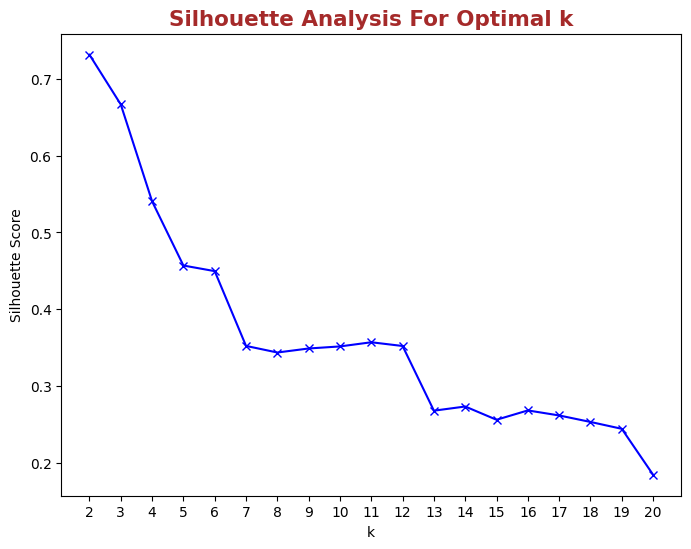

In [37]:
plt.plot(K, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.xticks(K)
plt.show()

> The graph indicates that the optimal number of clusters should be 2, as the silhouette score for `k=2` is the highest. However, in our case, the silhouette score doesn't accurately reflect our data due to the shape of the data observed using TSNE. When the data is not easily separable, the silhouette score can be misleading.


In [38]:
kmeans = KMeans(n_clusters=8 ,init="k-means++")
kmeans = kmeans.fit(df_copy)

Clusters = kmeans.labels_
Clusters

array([0, 4, 0, ..., 7, 7, 7], dtype=int32)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8636 samples in 0.004s...
[t-SNE] Computed neighbors for 8636 samples in 1.158s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8636
[t-SNE] Computed conditional probabilities for sample 2000 / 8636
[t-SNE] Computed conditional probabilities for sample 3000 / 8636
[t-SNE] Computed conditional probabilities for sample 4000 / 8636
[t-SNE] Computed conditional probabilities for sample 5000 / 8636
[t-SNE] Computed conditional probabilities for sample 6000 / 8636
[t-SNE] Computed conditional probabilities for sample 7000 / 8636
[t-SNE] Computed conditional probabilities for sample 8000 / 8636
[t-SNE] Computed conditional probabilities for sample 8636 / 8636
[t-SNE] Mean sigma: 0.433627
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.236145
[t-SNE] KL divergence after 300 iterations: 2.515277


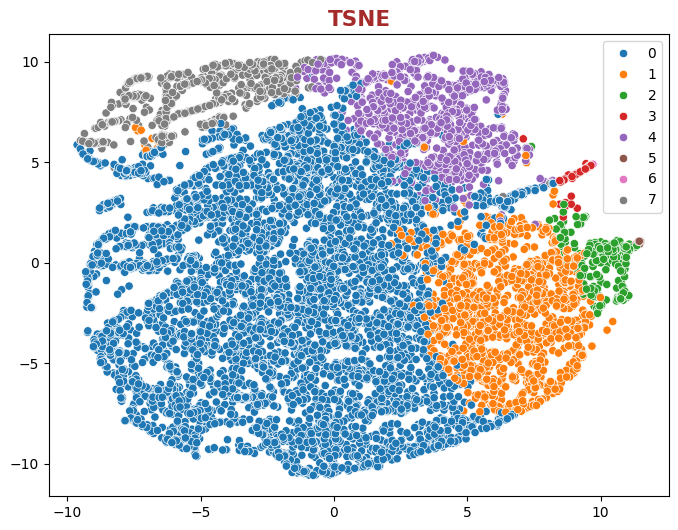

In [39]:
TSNE_2D(df_copy, hue=Clusters)

>The clustering results are not satisfactory as there is overlap between classes. Therefore, I will utilize Principal Component Analysis (PCA) on the data to improve the clustering outcome.


## Applying PCA

In [40]:
pca = PCA(n_components=.95)
pca_result = pca.fit_transform(df_copy)

print('Explained variation summation for all components: {}'.format(sum(pca.explained_variance_ratio_)))

Explained variation summation for all components: 0.9531047297911618


In [41]:
pca_result.shape

(8636, 7)

After applying PCA, the number of columns has been reduced from 17 to 7 while retaining approximately 95% of the information in the data.

#### Elbow Method

In [42]:
wss = []
K = range(2,21)

for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans=kmeans.fit(pca_result)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

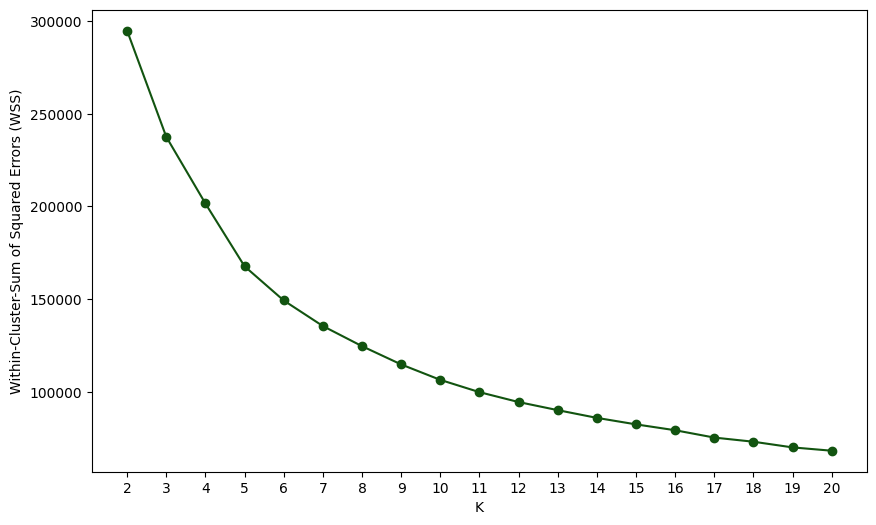

In [43]:
plt.figure(figsize=(10,6))
plt.plot(K,wss, marker = 'o', c = pick_random_color())
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.xticks(K);

> From the graph, I found the best number of clusters is 8 **(using elbow method)**

In [44]:
kmeans = KMeans(n_clusters=8 ,init="k-means++")
kmeans = kmeans.fit(pca_result)

Clusters = kmeans.labels_
Clusters

array([1, 7, 1, ..., 1, 1, 1], dtype=int32)

In [45]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result)

tsne_2d_one = tsne_results[:,0]
tsne_2d_two = tsne_results[:,1]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8636 samples in 0.014s...
[t-SNE] Computed neighbors for 8636 samples in 0.694s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8636
[t-SNE] Computed conditional probabilities for sample 2000 / 8636
[t-SNE] Computed conditional probabilities for sample 3000 / 8636
[t-SNE] Computed conditional probabilities for sample 4000 / 8636
[t-SNE] Computed conditional probabilities for sample 5000 / 8636
[t-SNE] Computed conditional probabilities for sample 6000 / 8636
[t-SNE] Computed conditional probabilities for sample 7000 / 8636
[t-SNE] Computed conditional probabilities for sample 8000 / 8636
[t-SNE] Computed conditional probabilities for sample 8636 / 8636
[t-SNE] Mean sigma: 0.247926
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.926727
[t-SNE] KL divergence after 300 iterations: 2.360728


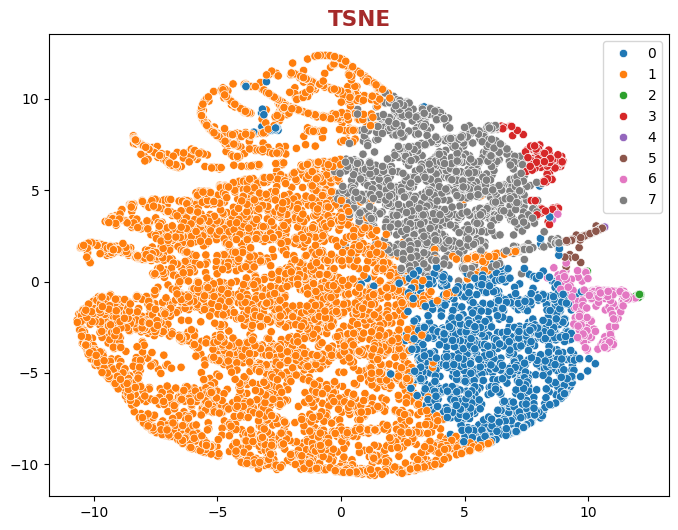

In [46]:
sns.scatterplot(
    x=tsne_2d_one, y=tsne_2d_two,
    hue=Clusters,
    palette="tab10",
    legend="full"
)
plt.title("TSNE");

After applying PCA, there has been an improvement in the results. Now, I will attempt another transformation, such as Log transformation, to further enhance the analysis.

### Data Transformation (Log)

In [47]:
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322               NaN          0.000000       6  
8947    81

In [48]:
copy_df = df.copy()
copy_df = copy_df.dropna().reset_index(drop=True)
copy_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3   817.714335           1.000000      16.00             16.00   
4  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00      0.000000             0.083333   
4                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
3                    0.00                 0              1        1200.0   
4                    0.00                 0              8        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3   678.334763        244.791237          0.000000      12  
4  1400.057770       2407.246035          0.000000      12

In [49]:
def change_zero(value):
    if value==0:
        return value+0.001
    return value


for col in copy_df[other_cols + medium_cols]:
    copy_df[col] = np.log(copy_df[col].apply(change_zero))

copy_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3.711148           0.818182   4.558079         -6.907755   
1     8.071677           0.909091  -6.907755         -6.907755   
2     7.822104           1.000000   6.650499          6.650499   
3     6.706513           1.000000   2.772589          2.772589   
4     7.500988           1.000000   7.195397         -6.907755   
...        ...                ...        ...               ...   
8631  1.770146           0.500000   3.039749          3.039749   
8632  3.349677           1.000000   5.673736         -6.907755   
8633  3.152679           0.833333   4.972587         -6.907755   
8634  2.599541           0.833333  -6.907755         -6.907755   
8635  5.920795           0.666667   6.996910          6.996910   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   4.558079     -6.907755             0.166667   
1                  -6.907755      8.770741             0.000000   
2                  -6.907755     -6.907755             1.000000   
3                  -6.907755     -6.907755             0.083333   
4                   7.195397     -6.907755             0.666667   
...                      ...           ...                  ...   
8631               -6.907755     -6.907755             0.166667   
8632                5.673736     -6.907755             1.000000   
8633                4.972587     -6.907755             0.833333   
8634               -6.907755      3.598921             0.000000   
8635               -6.907755      4.844502             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8631                    0.166667                          0.000000   
8632                    0.000000                          0.833333   
8633                    0.000000                          0.666667   
8634                    0.000000                          0.000000   
8635                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000         -6.907755       0.693147      6.907755   
1                   0.250000          1.386294      -6.907755      8.853665   
2                   0.000000         -6.907755       2.484907      8.922658   
3                   0.000000         -6.907755       0.000000      7.090077   
4                   0.000000         -6.907755       2.079442      7.495542   
...                      ...               ...            ...           ...   
8631                0.000000         -6.907755       0.000000      6.214608   
8632                0.000000         -6.907755       1.791759      6.907755   
8633                0.000000         -6.907755       1.609438      6.907755   
8634                0.166667          0.693147      -6.907755      6.214608   
8635                0.333333          0.693147       3.135494      7.090077   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0     5.307287          4.938135          0.000000  2.484907  
1     8.319482          6.977599          0.222222  2.484907  
2     6.433047          6.441401          0.000000  2.484907  
3     6.519641          5.500406          0.000000  2.484907  
4     7.244269          7.786239          0.000000  2.484907  
...        ...               ...               ...       ...  
8631  4.071500          3.772157          0.000000  1.791759  
8632  5.785653          3.889499          0.500000  1.791759  
8633  4.397786          4.411808          0.250000  

In [50]:
copy_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

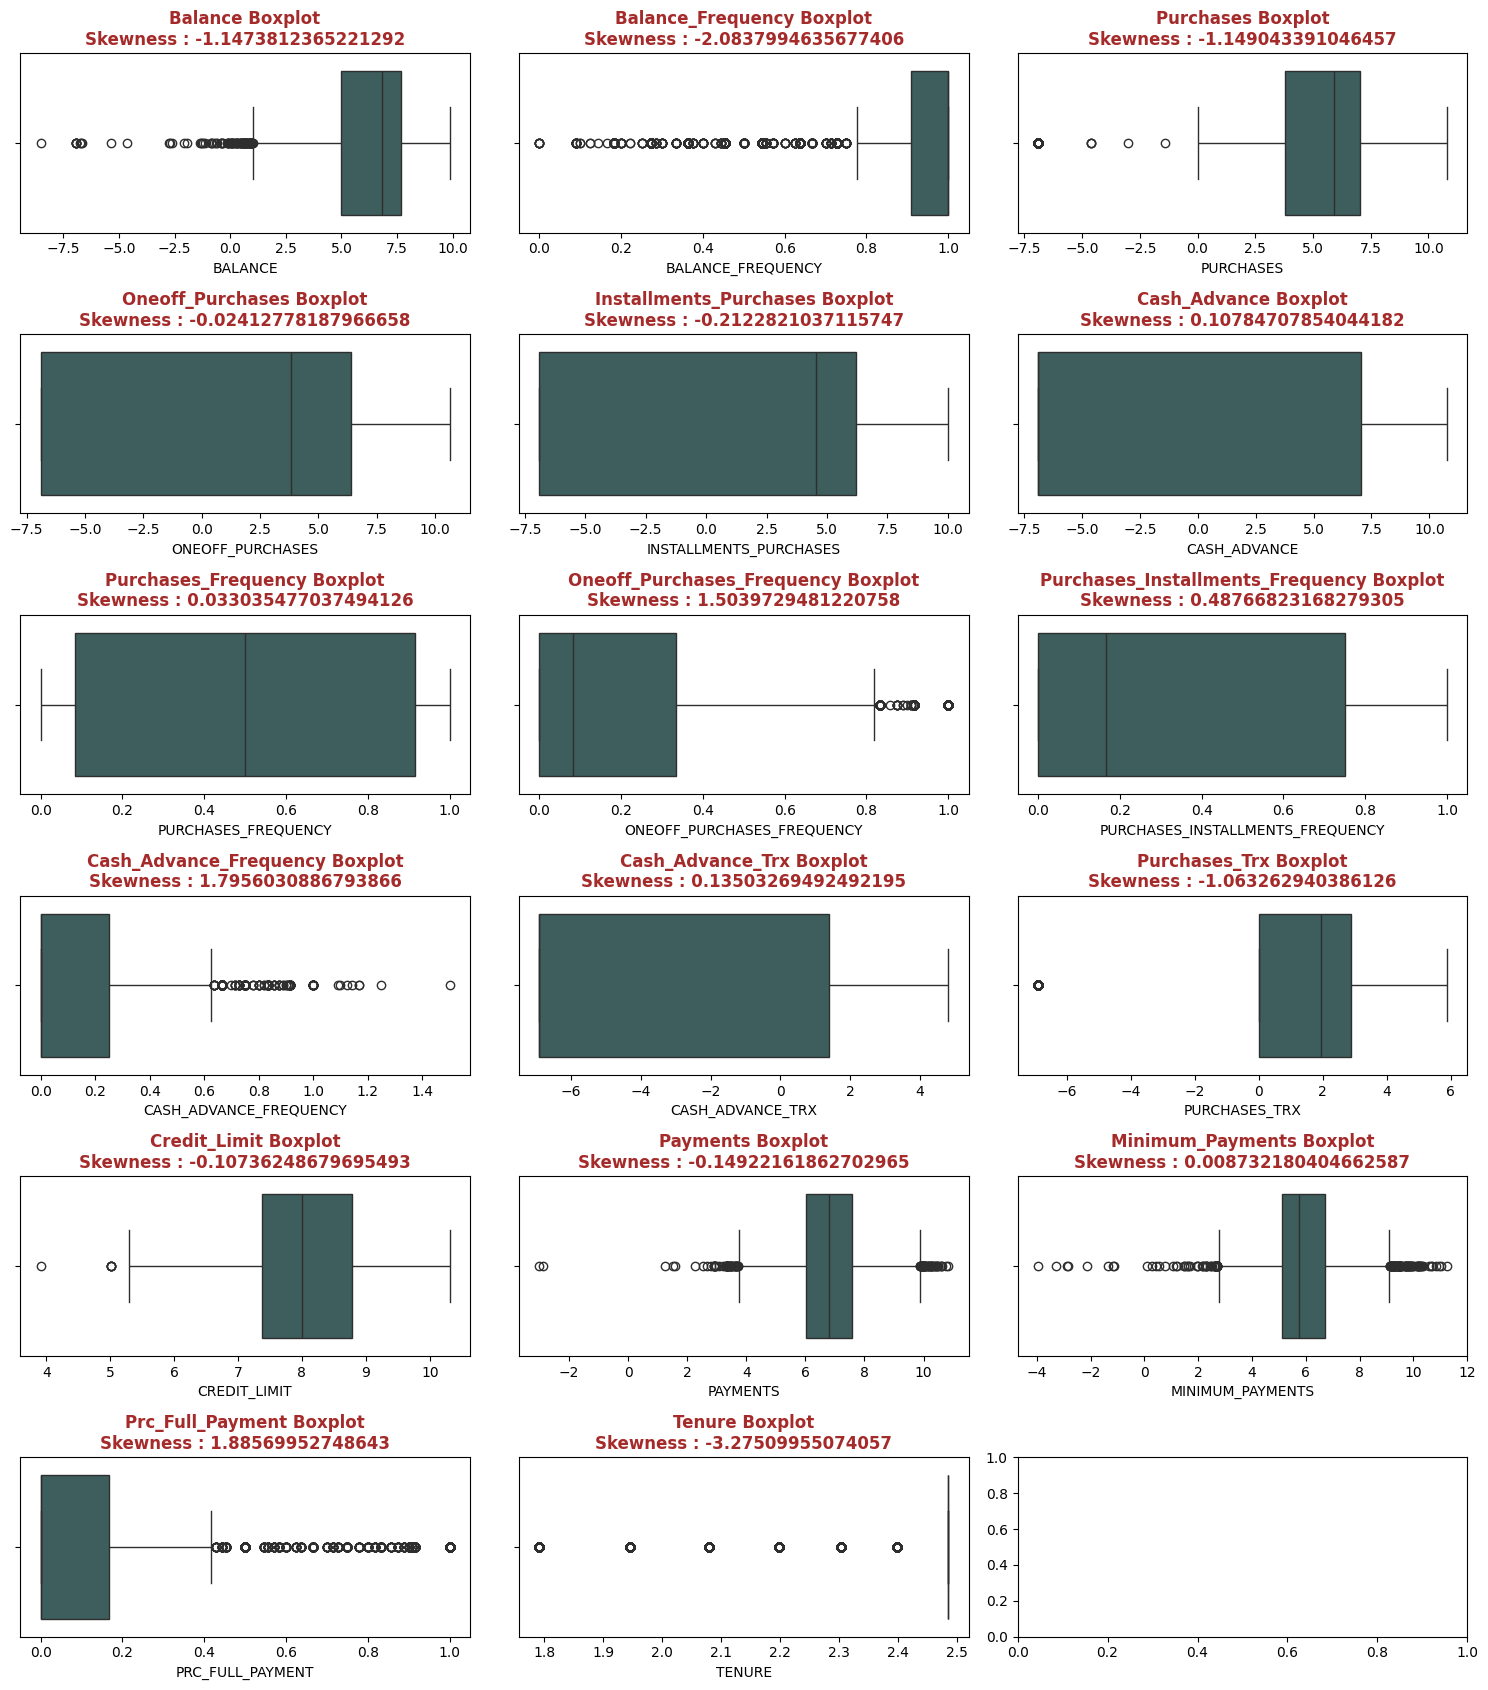

In [51]:
show_distribution(copy_df, copy_df.columns)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8636 samples in 0.002s...
[t-SNE] Computed neighbors for 8636 samples in 0.743s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8636
[t-SNE] Computed conditional probabilities for sample 2000 / 8636
[t-SNE] Computed conditional probabilities for sample 3000 / 8636
[t-SNE] Computed conditional probabilities for sample 4000 / 8636
[t-SNE] Computed conditional probabilities for sample 5000 / 8636
[t-SNE] Computed conditional probabilities for sample 6000 / 8636
[t-SNE] Computed conditional probabilities for sample 7000 / 8636
[t-SNE] Computed conditional probabilities for sample 8000 / 8636
[t-SNE] Computed conditional probabilities for sample 8636 / 8636
[t-SNE] Mean sigma: 0.749932
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.817368
[t-SNE] KL divergence after 300 iterations: 2.241215


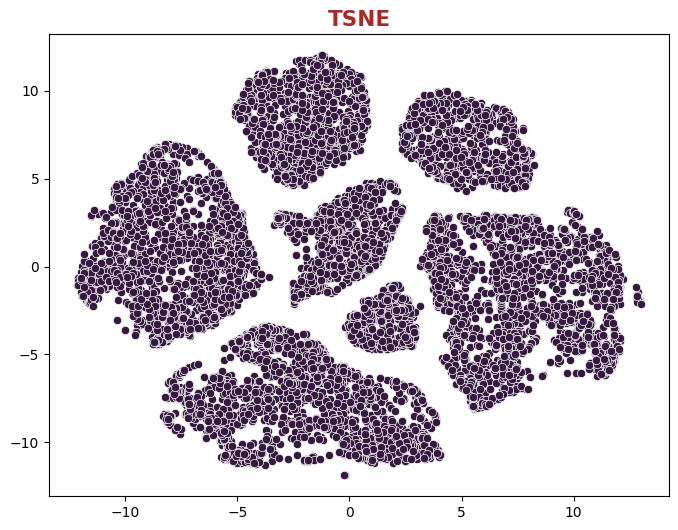

In [52]:
TSNE_2D(copy_df)

> After try another transformation (Log transformation), These are the next step:
    - Use Elbow method to determine best k
    - Plot TSNE to see the clusters

### Finding Optimum Value of K

#### Elbow Method

In [53]:
wss = []
K = range(2,20)

for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans=kmeans.fit(copy_df)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

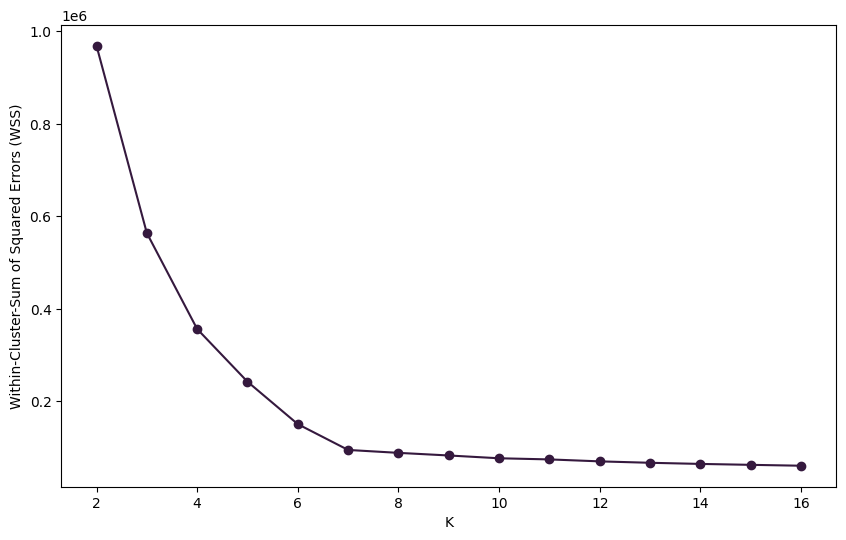

In [54]:
plt.figure(figsize=(10,6))
plt.plot(K[:15],wss[:15], marker = 'o')
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)');

> From the graph, I found the best number of clusters is 7 **(using elbow method)**

### Silhouette Score

In [55]:
sil = []
K = range(2,21)
for k in K:
  kmeans = KMeans(n_clusters = k).fit(copy_df)
  labels = kmeans.labels_
  sil.append(metrics.silhouette_score(copy_df, labels, metric = 'euclidean'))

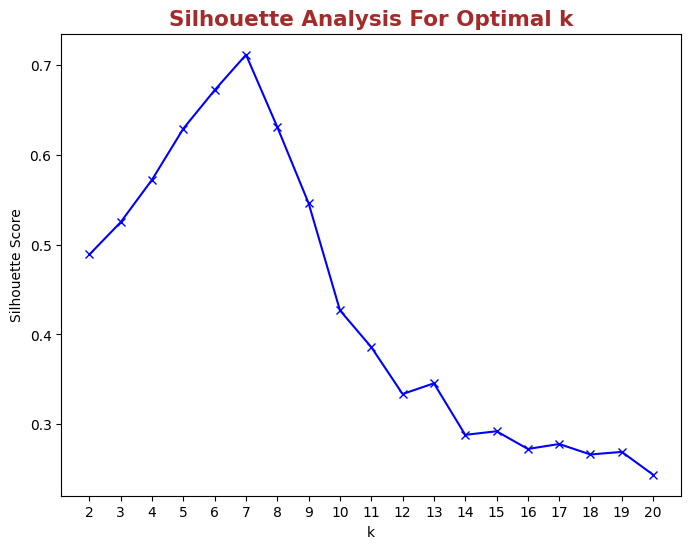

In [56]:
plt.plot(K, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.xticks(K)
plt.show()

> From the graph, I found the best number of clusters is 7 **(using silhouette method)**

> In this scenario, the silhouette score aligns with the number of clusters suggested by the elbow method. After applying log transformation and visualizing the data using TSNE, we discovered that the data can be separated, allowing us to estimate the number of clusters from the visualization.

**When data points overlap, the silhouette score can be misleading. As a result, it's common practice to utilize multiple methods such as elbow method, silhouette analysis, hierarchical clustering, etc., along with visualizations to better understand and determine the appropriate number of clusters.**


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8636 samples in 0.009s...
[t-SNE] Computed neighbors for 8636 samples in 0.743s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8636
[t-SNE] Computed conditional probabilities for sample 2000 / 8636
[t-SNE] Computed conditional probabilities for sample 3000 / 8636
[t-SNE] Computed conditional probabilities for sample 4000 / 8636
[t-SNE] Computed conditional probabilities for sample 5000 / 8636
[t-SNE] Computed conditional probabilities for sample 6000 / 8636
[t-SNE] Computed conditional probabilities for sample 7000 / 8636
[t-SNE] Computed conditional probabilities for sample 8000 / 8636
[t-SNE] Computed conditional probabilities for sample 8636 / 8636
[t-SNE] Mean sigma: 0.749932
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.817368
[t-SNE] KL divergence after 300 iterations: 2.241215


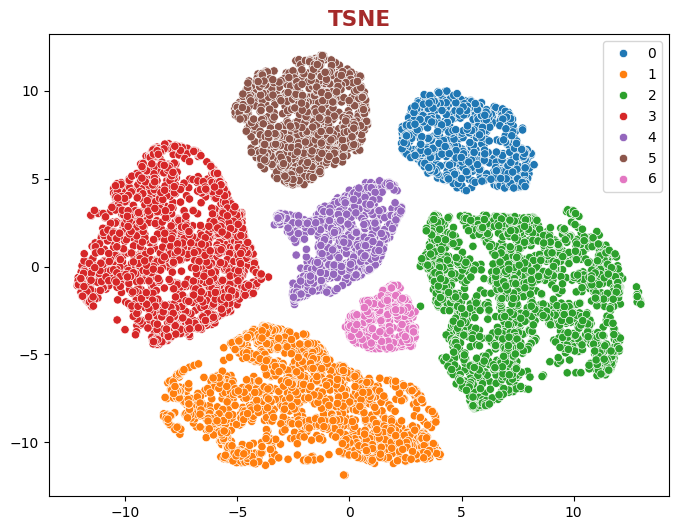

In [57]:
kmeans = KMeans(n_clusters=7 ,init="k-means++")
kmeans = kmeans.fit(copy_df)

Clusters = kmeans.labels_

TSNE_2D(copy_df, hue=Clusters)

Now that the results are satisfactory, the next step will involve utilizing different methods to determine the optimal number of clusters.

### Hierarchical Clustering

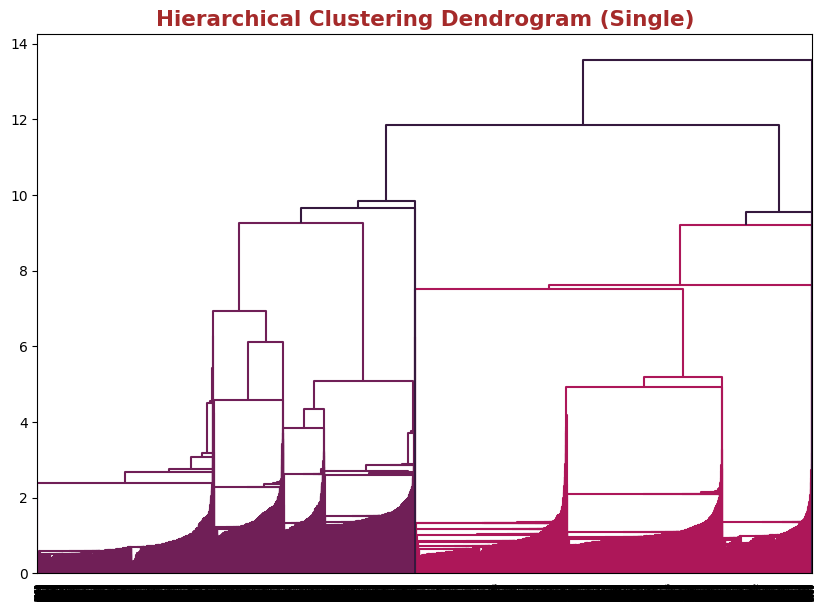

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(copy_df, 'single')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Single)')
plt.show()

Taking a horizontal line at 6 on the y-axis will result in 7 clusters. There isn't a specific number from which to draw the horizontal line; rather, you can experiment with different values to observe the distribution and number of points in each cluster.

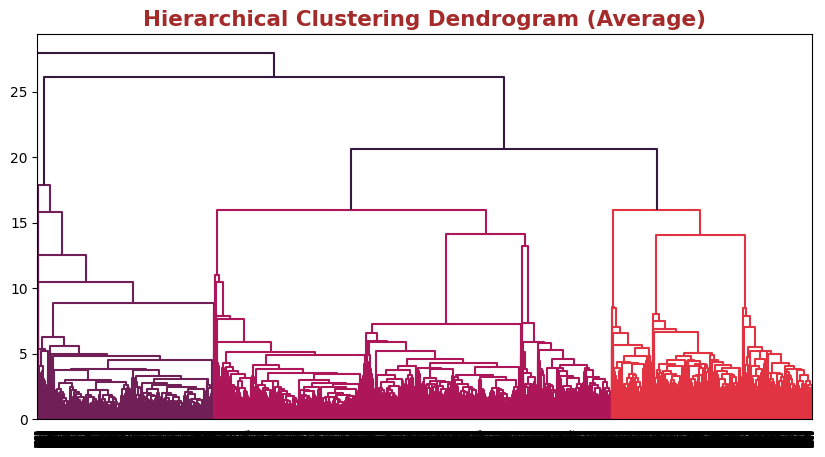

In [ ]:
Z = linkage(copy_df, 'average')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Average)')
plt.show()

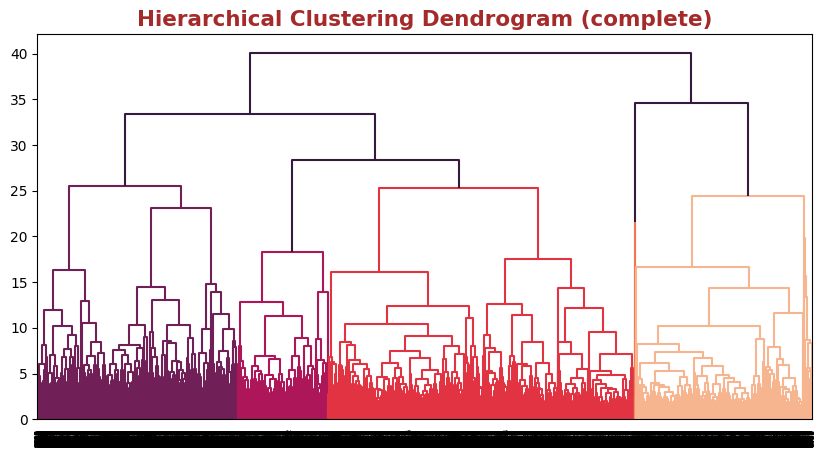

In [ ]:
Z = linkage(copy_df, 'complete')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (complete)')
plt.show()

In [59]:
from sklearn.cluster import AgglomerativeClustering

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8636 samples in 0.002s...
[t-SNE] Computed neighbors for 8636 samples in 0.713s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8636
[t-SNE] Computed conditional probabilities for sample 2000 / 8636
[t-SNE] Computed conditional probabilities for sample 3000 / 8636
[t-SNE] Computed conditional probabilities for sample 4000 / 8636
[t-SNE] Computed conditional probabilities for sample 5000 / 8636
[t-SNE] Computed conditional probabilities for sample 6000 / 8636
[t-SNE] Computed conditional probabilities for sample 7000 / 8636
[t-SNE] Computed conditional probabilities for sample 8000 / 8636
[t-SNE] Computed conditional probabilities for sample 8636 / 8636
[t-SNE] Mean sigma: 0.749932
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.817368
[t-SNE] KL divergence after 300 iterations: 2.241215


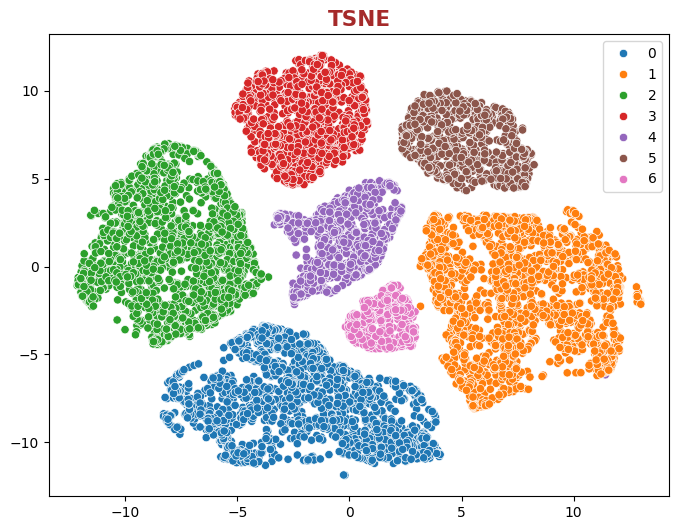

In [62]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=7).fit(copy_df)
Clusters = clustering.labels_

TSNE_2D(copy_df, hue=Clusters)

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=5, min_samples=500)
labels = dbscan.fit_predict(copy_df)
labels

array([0, 1, 2, ..., 0, 1, 5])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8636 samples in 0.001s...
[t-SNE] Computed neighbors for 8636 samples in 0.655s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8636
[t-SNE] Computed conditional probabilities for sample 2000 / 8636
[t-SNE] Computed conditional probabilities for sample 3000 / 8636
[t-SNE] Computed conditional probabilities for sample 4000 / 8636
[t-SNE] Computed conditional probabilities for sample 5000 / 8636
[t-SNE] Computed conditional probabilities for sample 6000 / 8636
[t-SNE] Computed conditional probabilities for sample 7000 / 8636
[t-SNE] Computed conditional probabilities for sample 8000 / 8636
[t-SNE] Computed conditional probabilities for sample 8636 / 8636
[t-SNE] Mean sigma: 0.749932
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.817368
[t-SNE] KL divergence after 300 iterations: 2.241215


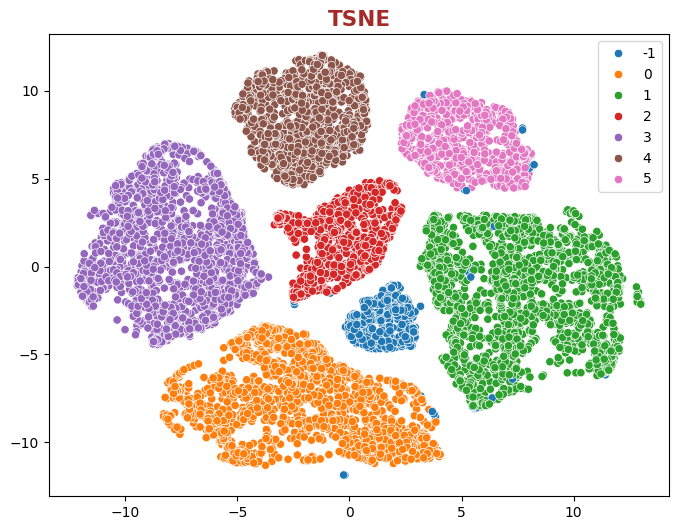

In [ ]:
TSNE_2D(copy_df, hue=labels)

> I set the minimum number of data points required to form a cluster to 500 customers with `epsilon = 5`. The resulting number of clusters is 7, which aligns well with the previous techniques and indicates a satisfactory outcome.


### Gap Statistic Method

The gap statistic is a statistical method utilized to ascertain the optimal number of clusters in a dataset. It evaluates the within-cluster dispersion and contrasts it with the expected dispersion under a suitable reference null distribution of the data.

> Dispersion refers to how spread out or compact the points are within each cluster. Ideally, we seek clusters where the points are closely grouped together.

The gap statistic assesses the spread of points within our actual clusters in comparison to the expected spread if there were no genuine clusters, only random noise.

In [ ]:
%%capture
!pip install gap-stat

In [ ]:
from gap_statistic import OptimalK

optimalK = OptimalK(parallel_backend='joblib')
n_clusters = optimalK(copy_df, cluster_array=np.arange(1, 11))

print(f'Optimal number of clusters: {n_clusters}')

Optimal number of clusters: 7


Optimal number of clusters: 7


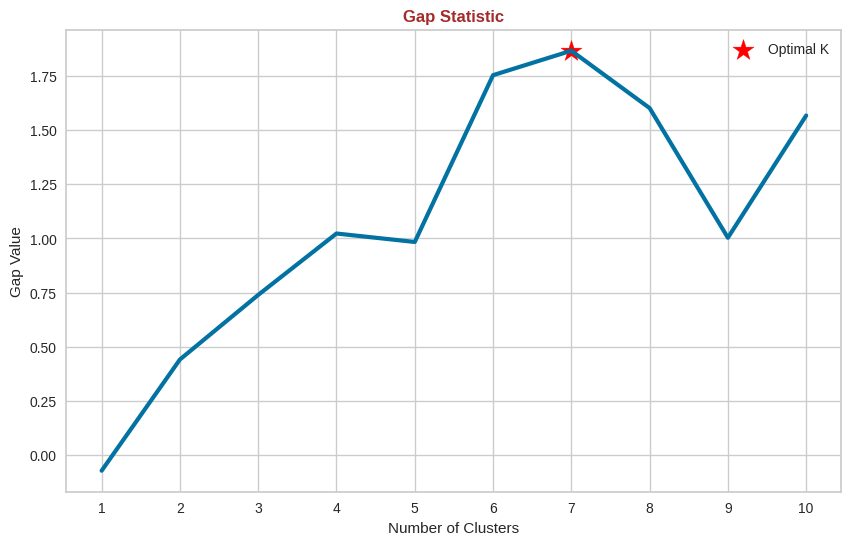

In [ ]:
print(f'Optimal number of clusters: {n_clusters}')

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 11), optimalK.gap_df.gap_value, linewidth=3, color='b')
plt.scatter(n_clusters, optimalK.gap_df.loc[n_clusters-1, 'gap_value'], s=250, c='red', marker='*', label='Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Gap Value')
plt.title('Gap Statistic')
plt.xticks(np.arange(1, 11))
plt.legend()
plt.grid(True)
plt.show()

**After experimenting with various techniques and data transformations, it has been determined that the optimal number of clusters is 7.**

**Next Steps:**
1. Apply KMeans algorithm with 7 clusters.
2. Visualize the data using t-SNE.
3. Perform analysis for each cluster separately, providing insights for each cluster.

In [18]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(copy_df)
labels = kmeans.labels_
copy_df['label'] = labels
copy_df.head(3)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  3.711148           0.818182   4.558079         -6.907755   
1  8.071677           0.909091  -6.907755         -6.907755   
2  7.822104           1.000000   6.650499          6.650499   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                4.558079     -6.907755             0.166667   
1               -6.907755      8.770741             0.000000   
2               -6.907755     -6.907755             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   
1                         0.0                          0.000000   
2                         1.0                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00         -6.907755       0.693147      6.907755   
1                    0.25          1.386294      -6.907755      8.853665   
2                    0.00         -6.907755       2.484907      8.922658   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  label  
0  5.307287          4.938135          0.000000  2.484907      0  
1  8.319482          6.977599          0.222222  2.484907      1  
2  6.433047          6.441401          0.000000  2.484907      5

### Analysis Data After Clustering
I will conduct an analysis using the original, non-transformed data to provide genuine insights along with relevant statistics.


In [19]:
final_df = df.copy()
final_df = final_df.dropna().reset_index(drop=True)
final_df['label'] = labels
final_df.head(3)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   
1                         0.0                          0.000000   
2                         1.0                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  label  
0   201.802084        139.509787          0.000000      12      0  
1  4103.032597       1072.340217          0.222222      12      1  
2   622.066742        627.284787          0.000000      12      5

In [20]:
final_df.shape

(8636, 18)

In [ ]:
# def cluster_distribution(label):
#   filtered_df_label = final_df[final_df['label'] == label]
#   fig, ax = plt.subplots(5, 3, figsize=(20,15))
#   ax = ax.ravel()
#   color = pick_random_color()

#   for i, column in enumerate(filtered_df_label.columns[:15]):
#       plt.sca(ax[i])
#       sns.histplot(filtered_df_label[column], kde=True, bins=20, color=color)
#       plt.title(f'Distribution of {column} (Label {label})')
#       plt.xlabel(column)
#       plt.ylabel('Frequency')

#   plt.tight_layout()


In [21]:
def cluster_distribution(feature):
  labels = np.unique(final_df['label'])
  fig, ax = plt.subplots(2,4, figsize=(20,12))
  ax = ax.ravel()
  color = pick_random_color()

  for i, label in enumerate(labels):
    if i==len(labels):
      plt.axis('off')
      break
    plt.sca(ax[i])
    filtered_df_label = final_df[final_df['label'] == label]
    sns.histplot(filtered_df_label[feature], kde=True, bins=20, color=color)
    plt.text(0.95, 0.95, f'Mean: {filtered_df_label[feature].mean():.2f}', fontsize=15,
            verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))
    plt.title(f'{feature} (Label {label})')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)

  plt.tight_layout()


In [22]:
columns = final_df.columns[:-1]
columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [24]:
descriptive_stat = final_df.groupby('label').mean()
descriptive_stat

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
label                                                                  
0       417.997394           0.823482   555.700560          0.000024   
1      2210.128502           0.903560     0.000036          0.000036   
2      2820.348251           0.969942  1937.376660       1164.268777   
3      1224.569419           0.938291  2480.785272       1518.061919   
4      2373.048636           0.934065   668.125026        668.169884   
5       789.894348           0.791265   904.646517        904.739980   
6      2586.316975           0.957269   540.957149          0.000066   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
label                                                              
0                  556.771965      0.000000             0.715350   
1                    0.044137   2011.501178             0.000300   
2                  773.413221   2089.644289             0.779415   
3                  962.751676      0.000000             0.813530   
4                    0.000000   2043.010254             0.278231   
5                    0.000000      0.000000             0.362754   
6                  541.612325   2060.461414             0.655552   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
label                                                                 
0                        0.000147                          0.680743   
1                        0.000131                          0.000296   
2                        0.396667                          0.629306   
3                        0.461805                          0.647499   
4                        0.278123                          0.000000   
5                        0.362422                          0.000000   
6                        0.000548                          0.608412   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
label                                                                          
0                    0.000000          0.000000      12.084366   3115.642114   
1                    0.276730          6.411675       0.003553   4053.409475   
2                    0.292063          7.761431      30.512922   5817.307268   
3                    0.000000          0.000000      34.672832   5717.862323   
4                    0.297126          6.917313       6.396641   4659.334038   
5                    0.000000          0.000000       8.018905   4420.806573   
6                    0.261845          6.197368      12.383772   4371.052632   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  
label                                                              
0       787.312846        715.119473          0.325498  11.506195  
1      1712.908803       1006.539923          0.046052  11.359898  
2      3040.598253       1242.064375          0.069889  11.623260  
3      2305.228589        613.768374          0.259856  11.806936  
4      1982.078441       1027.732962          0.059819  11.344961  
5      1213.610086        497.782868          0.144789  11.608955  
6      1976.169077       1451.871026          0.047440  11.320175

In [29]:
a = descriptive_stat['BALANCE'].to_numpy()
b = descriptive_stat['PURCHASES'].to_numpy()
np.corrcoef(a, b)

array([[ 1.       , -0.0289332],
       [-0.0289332,  1.       ]])

<Axes: xlabel='BALANCE', ylabel='PURCHASES'>

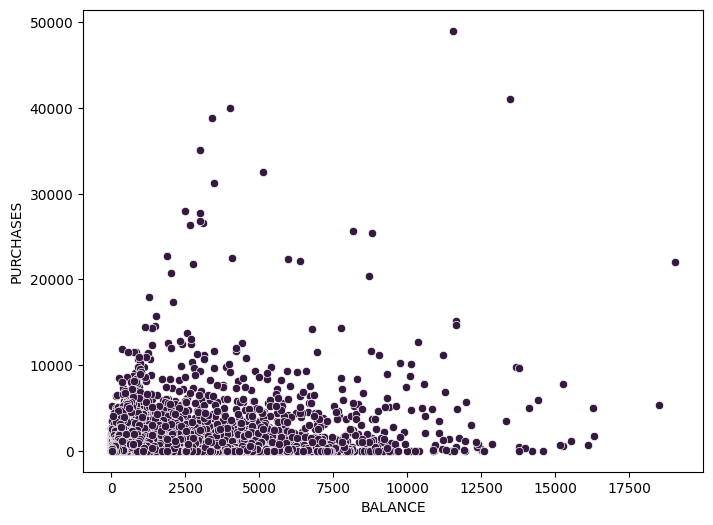

In [30]:
sns.scatterplot(data=final_df, x='BALANCE', y='PURCHASES')

There is no correlation between the account balance and purchase behavior.

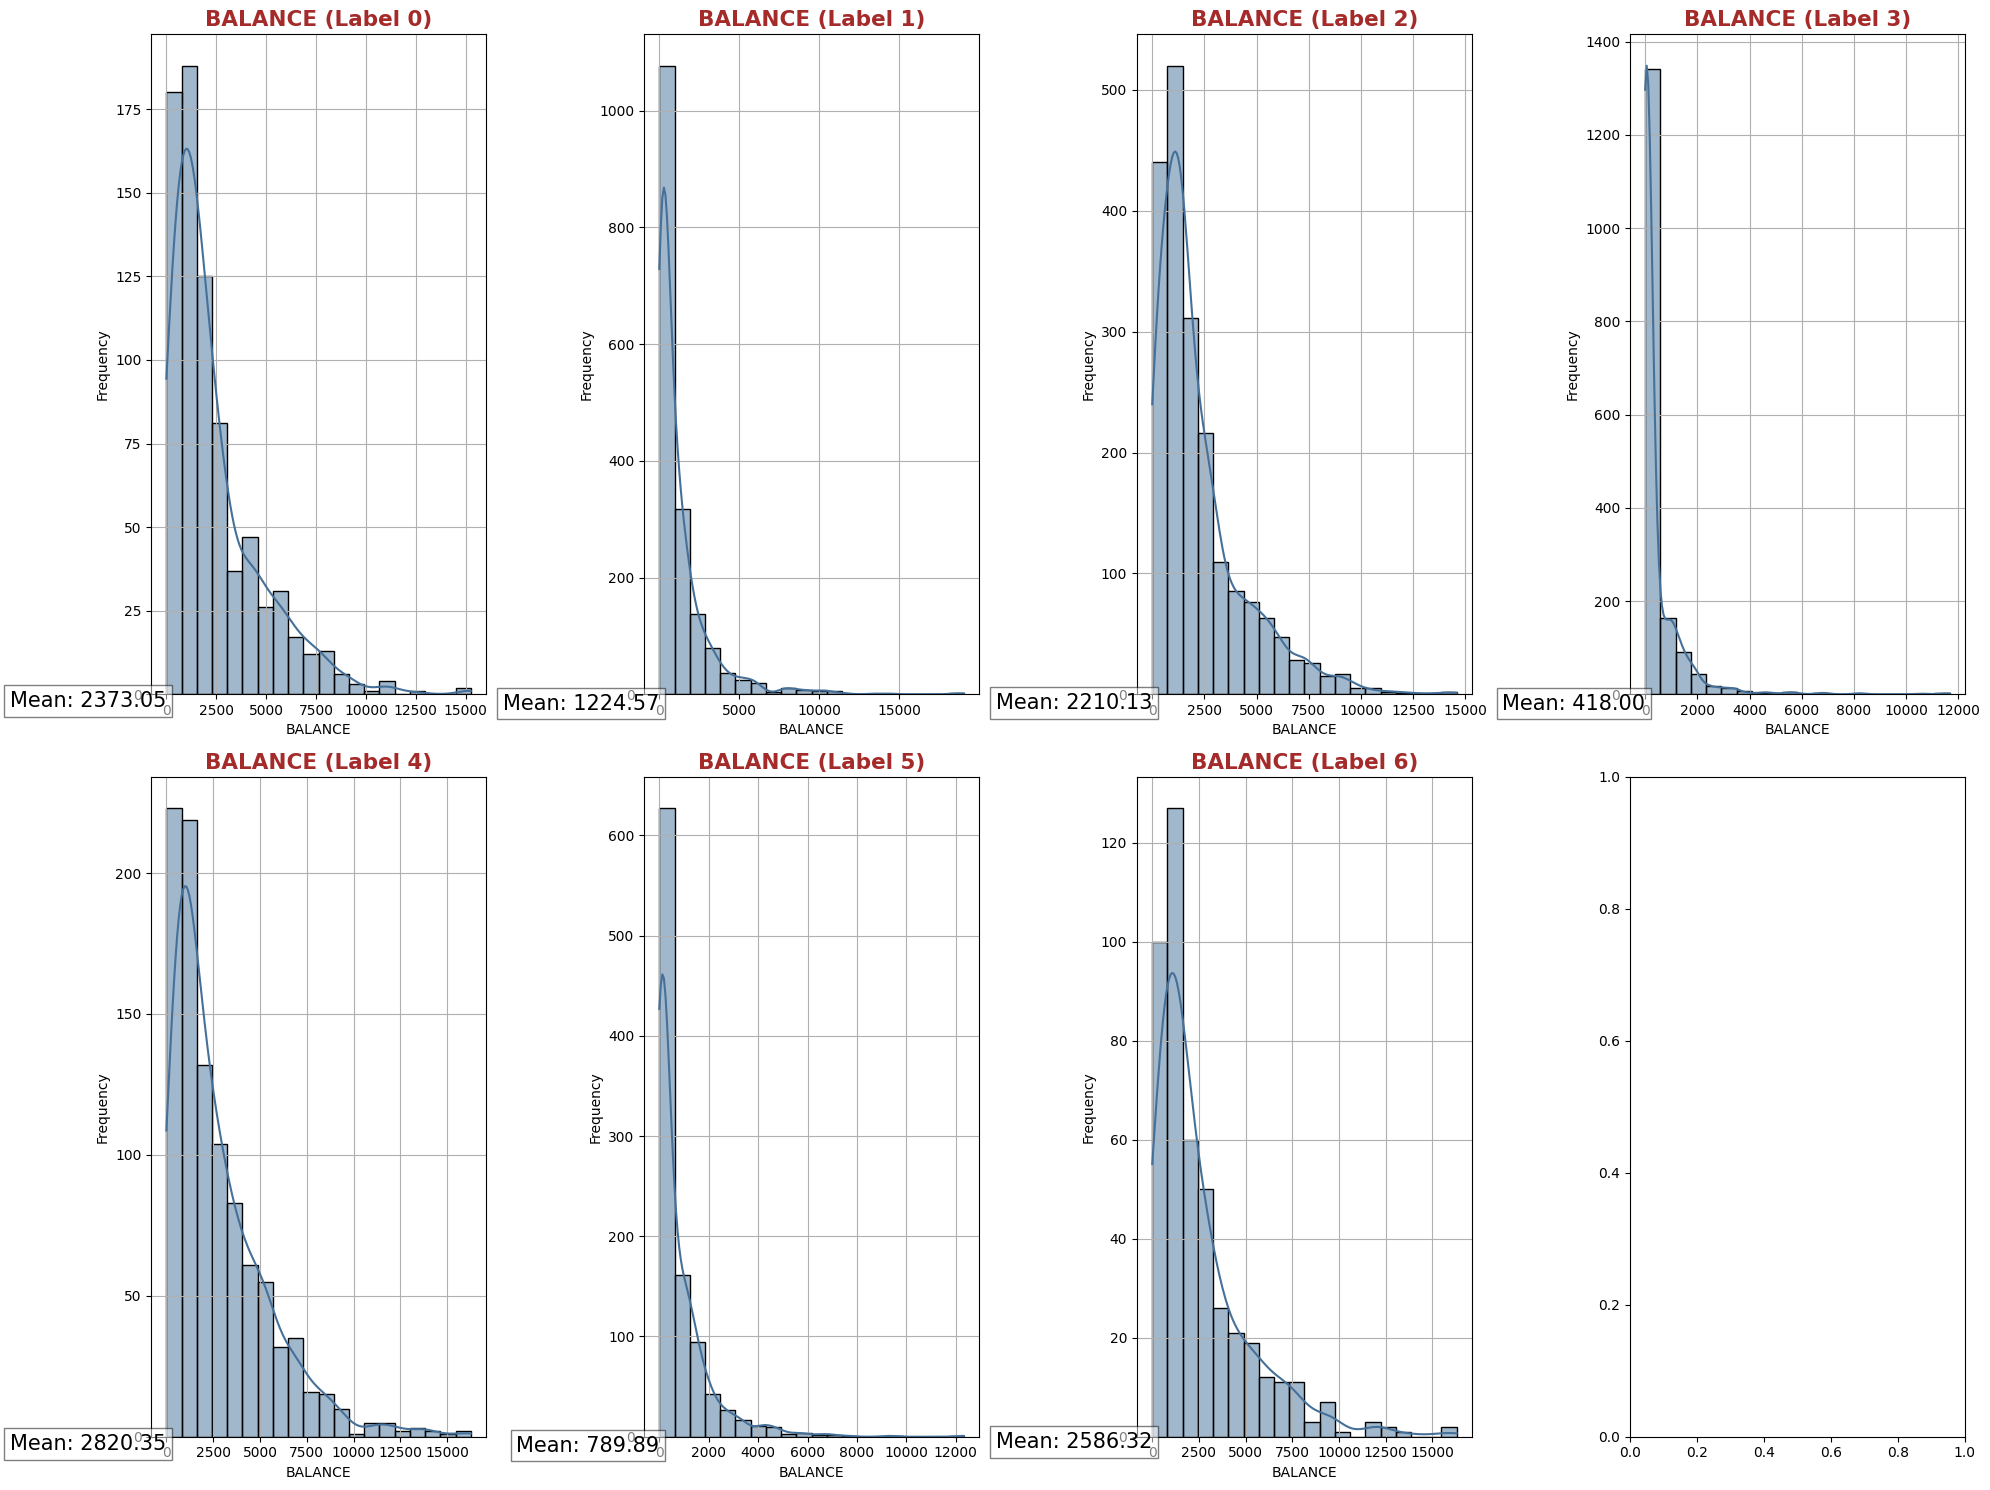

In [68]:
cluster_distribution(columns[0])

According to the balance within each cluster, we can categorize them into three groups:
1. Groups with an average balance around 2000.
2. Groups with an average balance ranging from 700 to 1000.
3. Groups with an average balance less than 700.

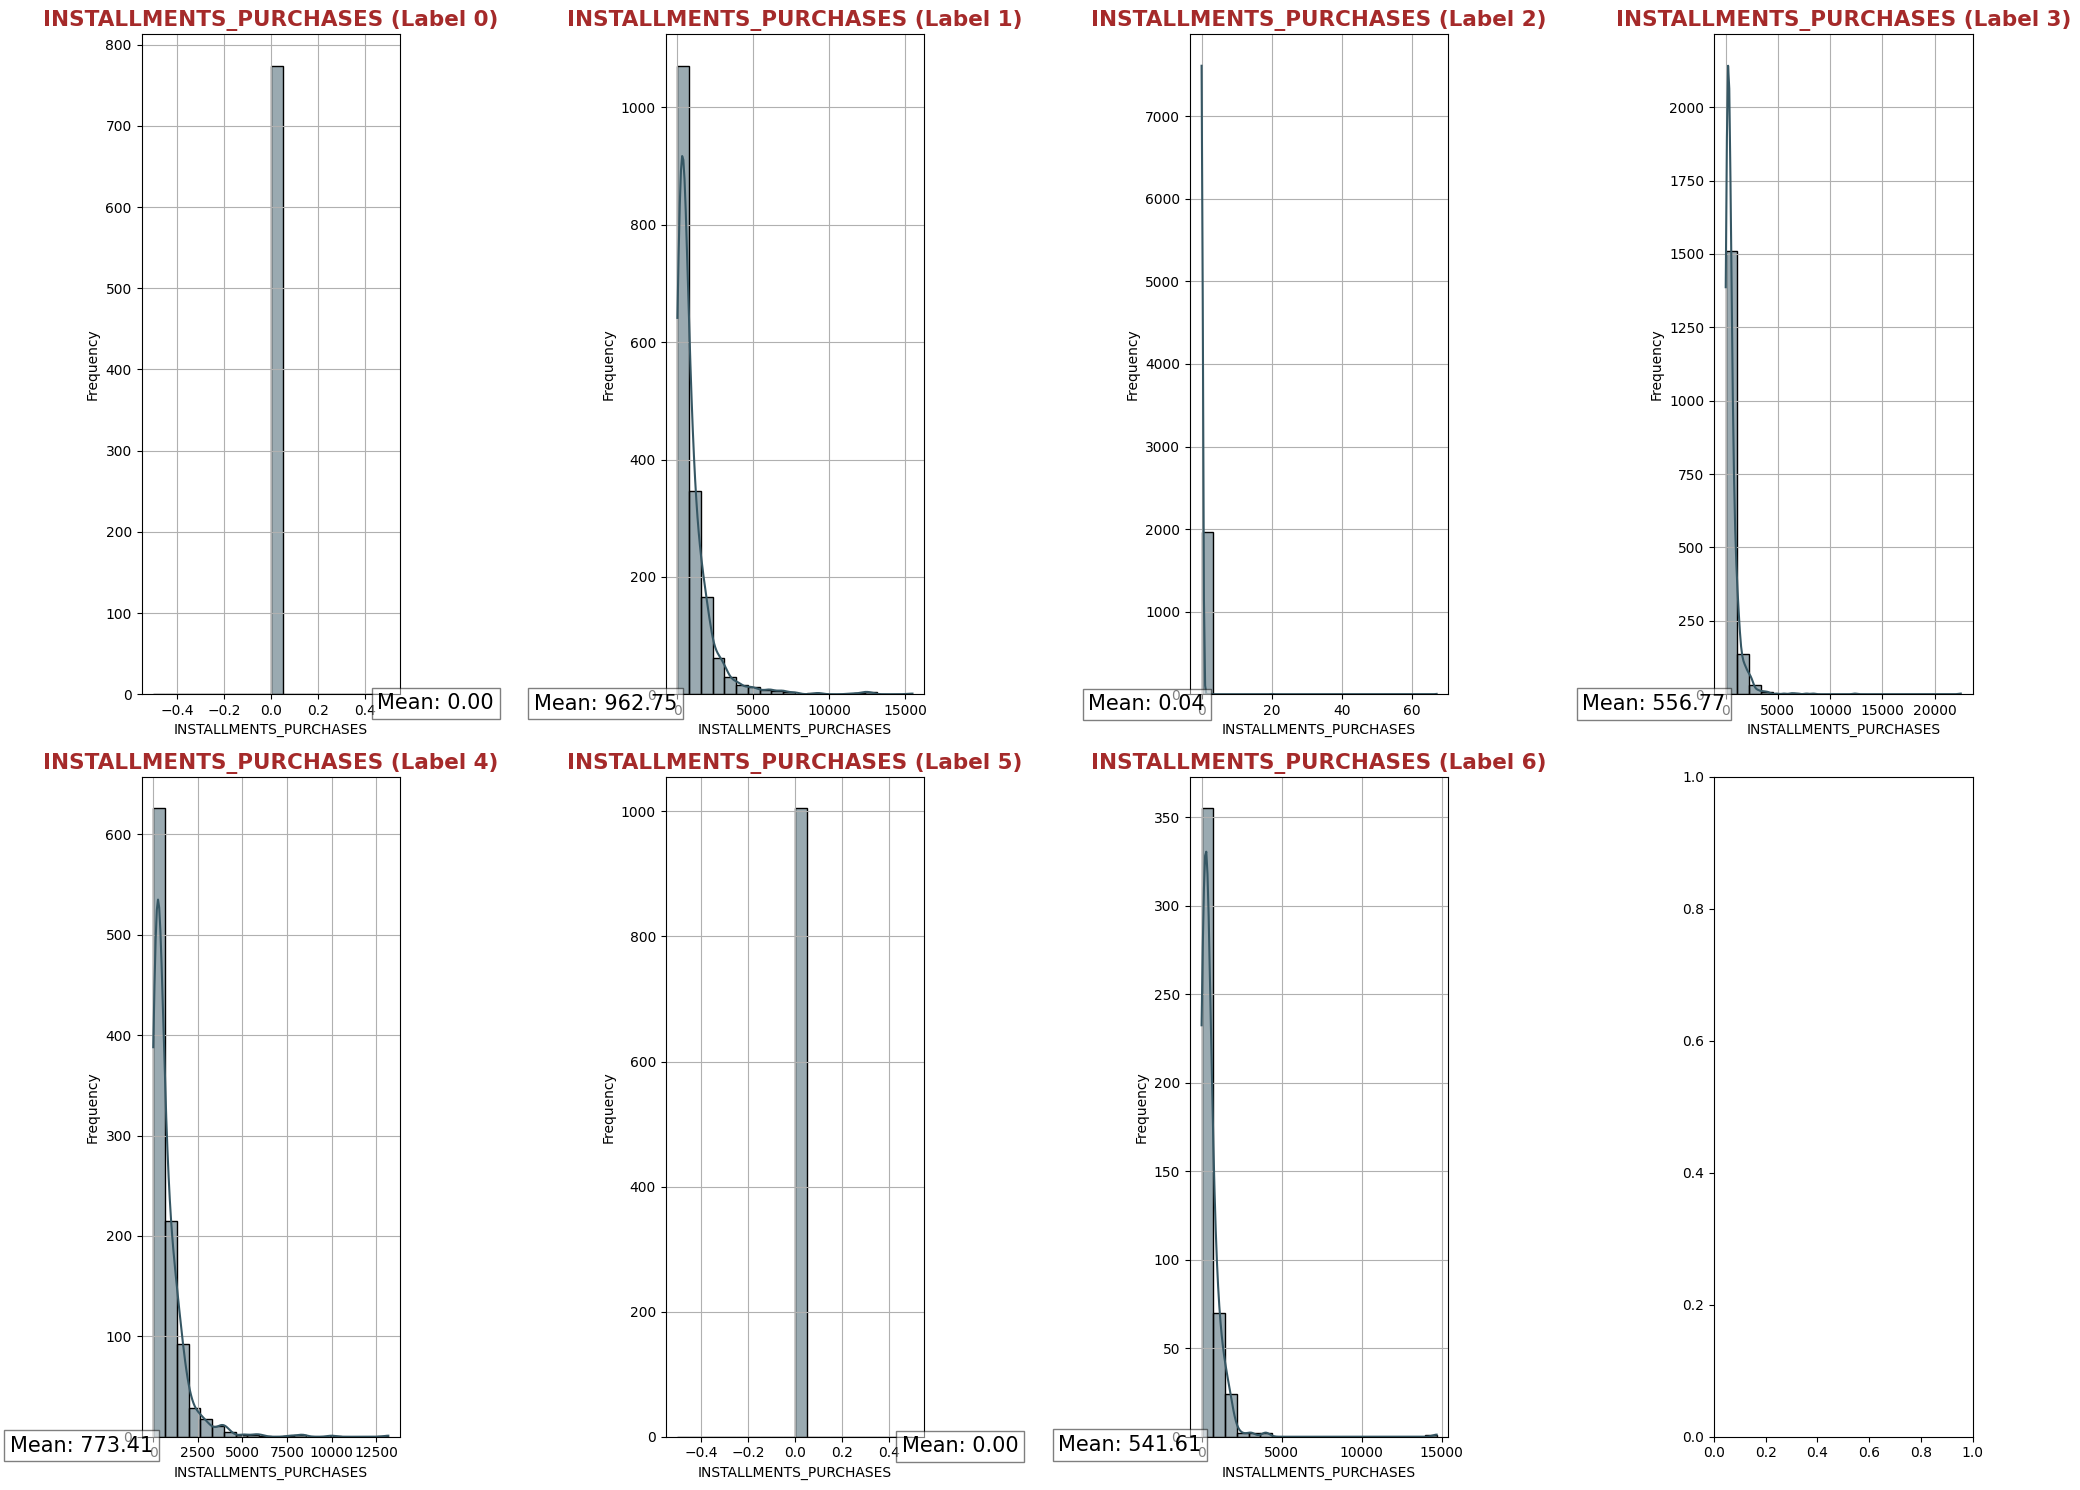

In [75]:
cluster_distribution(columns[4])

- We have two clusters with installment purchases having a mean of 0, indicating that they didn't make any installment purchases.
- We can categorize them into 3 groups:
  1. Didn't pay installments.
  2. Paid on average less than 500.
  3. Paid on average over 500 to almost 1000.

In [37]:
descriptive_stat

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
label                                                                  
0       417.997394           0.823482   555.700560          0.000024   
1      2210.128502           0.903560     0.000036          0.000036   
2      2820.348251           0.969942  1937.376660       1164.268777   
3      1224.569419           0.938291  2480.785272       1518.061919   
4      2373.048636           0.934065   668.125026        668.169884   
5       789.894348           0.791265   904.646517        904.739980   
6      2586.316975           0.957269   540.957149          0.000066   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
label                                                              
0                  556.771965      0.000000             0.715350   
1                    0.044137   2011.501178             0.000300   
2                  773.413221   2089.644289             0.779415   
3                  962.751676      0.000000             0.813530   
4                    0.000000   2043.010254             0.278231   
5                    0.000000      0.000000             0.362754   
6                  541.612325   2060.461414             0.655552   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
label                                                                 
0                        0.000147                          0.680743   
1                        0.000131                          0.000296   
2                        0.396667                          0.629306   
3                        0.461805                          0.647499   
4                        0.278123                          0.000000   
5                        0.362422                          0.000000   
6                        0.000548                          0.608412   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
label                                                                          
0                    0.000000          0.000000      12.084366   3115.642114   
1                    0.276730          6.411675       0.003553   4053.409475   
2                    0.292063          7.761431      30.512922   5817.307268   
3                    0.000000          0.000000      34.672832   5717.862323   
4                    0.297126          6.917313       6.396641   4659.334038   
5                    0.000000          0.000000       8.018905   4420.806573   
6                    0.261845          6.197368      12.383772   4371.052632   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  
label                                                              
0       787.312846        715.119473          0.325498  11.506195  
1      1712.908803       1006.539923          0.046052  11.359898  
2      3040.598253       1242.064375          0.069889  11.623260  
3      2305.228589        613.768374          0.259856  11.806936  
4      1982.078441       1027.732962          0.059819  11.344961  
5      1213.610086        497.782868          0.144789  11.608955  
6      1976.169077       1451.871026          0.047440  11.320175

In [ ]:
from scipy.stats import f_oneway

anova_results = {}

for feature in final_df.columns:
    clusters_data = [final_df[feature][final_df['label'] == cluster] for cluster in set(final_df['label'])]

    f_statistic, p_value = f_oneway(*clusters_data)

    anova_results[feature] = {'F-statistic': f_statistic, 'p-value': p_value}

for feature, results in anova_results.items():
    print(f"Feature: {feature}")
    print(f"F-statistic: {results['F-statistic']}, p-value: {results['p-value']}")
    print()

Feature: BALANCE
F-statistic: 292.519511869147, p-value: 0.0

Feature: BALANCE_FREQUENCY
F-statistic: 132.7157563995001, p-value: 2.6967240175024378e-161

Feature: PURCHASES
F-statistic: 308.7239879342734, p-value: 0.0

Feature: ONEOFF_PURCHASES
F-statistic: 228.51728730079446, p-value: 8.44382734792444e-272

Feature: INSTALLMENTS_PURCHASES
F-statistic: 323.76229394802243, p-value: 0.0

Feature: CASH_ADVANCE
F-statistic: 433.0943052306554, p-value: 0.0

Feature: PURCHASES_FREQUENCY
F-statistic: 2534.1278922277247, p-value: 0.0

Feature: ONEOFF_PURCHASES_FREQUENCY
F-statistic: 1195.882854897454, p-value: 0.0

Feature: PURCHASES_INSTALLMENTS_FREQUENCY
F-statistic: 2792.32945359183, p-value: 0.0

Feature: CASH_ADVANCE_FREQUENCY
F-statistic: 1388.970532740974, p-value: 0.0

Feature: CASH_ADVANCE_TRX
F-statistic: 467.95752259472795, p-value: 0.0

Feature: PURCHASES_TRX
F-statistic: 532.0231715875697, p-value: 0.0

Feature: CREDIT_LIMIT
F-statistic: 106.64893026542475, p-value: 4.06998790534

> These results indicate that there are significant differences between the clusters in terms of the various features.

**Some insights**:

1. **BALANCE:** The high F-statistic and very low p-value indicate that there are significant differences in the mean balances across clusters. This suggests that different clusters may have different average account balances and we can see that in the previous table.

2. **PURCHASES:** Again, high F-statistic and very low p-value, suggesting significant differences in the mean purchase amounts across clusters. This implies that different clusters may have customers with varying purchasing behaviors.

3. **ONEOFF_PURCHASES:** Similar to PURCHASES, indicating significant differences in the mean amounts of one-off purchases across clusters.

4. **INSTALLMENTS_PURCHASES:** Similar to PURCHASES, indicating significant differences in the mean amounts of installment purchases across clusters.

5. **CASH_ADVANCE:** High F-statistic and very low p-value, indicating significant differences in the mean cash advance amounts across clusters. This suggests that some clusters may have customers who use cash advances more frequently or in larger amounts.

In [ ]:
clusters_count = final_df.groupby('label')['BALANCE'].count().to_frame().reset_index()
clusters_count

label  BALANCE
0      0      774
1      1     1730
2      2     1970
3      3     1695
4      4     1006
5      5     1005
6      6      456

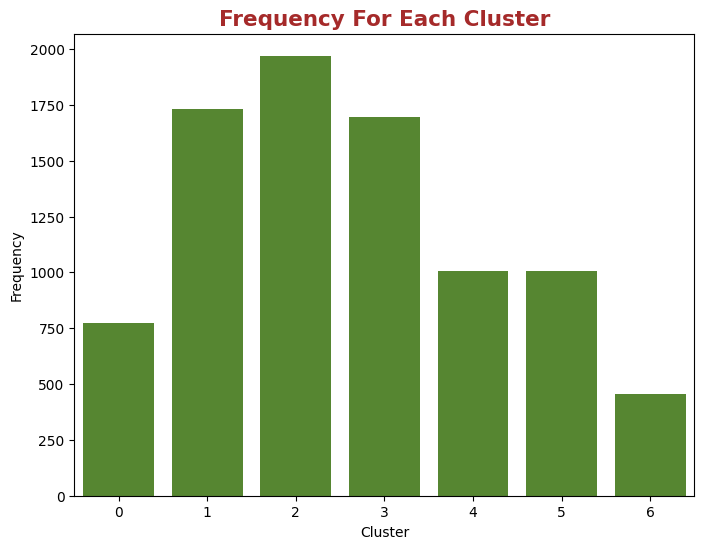

In [ ]:
sns.barplot(x=clusters_count['label'], y=clusters_count['BALANCE'], palette=[pick_random_color()]);
plt.title('Frequency For Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frequency');

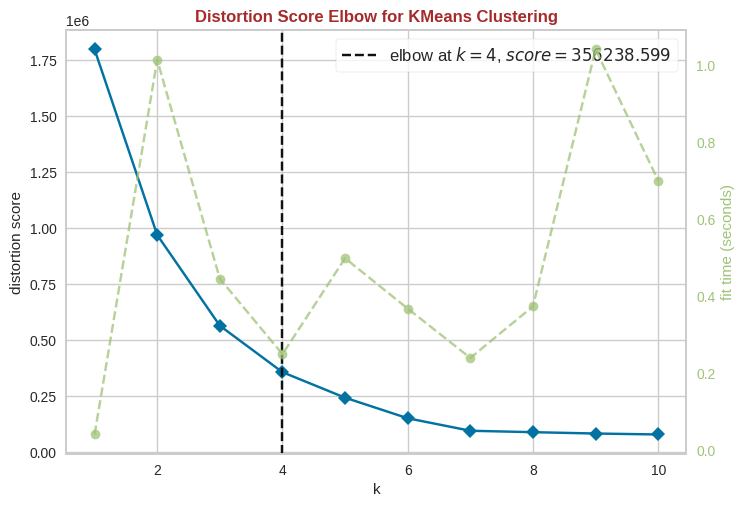

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

# Fit the visualizer to the data and visualize the elbow method plot
visualizer.fit(copy_df)
visualizer.show()